<p style="text-align: center; font-family: TimesNewRoman; font-size:3.750em;color:Black; font-style:bold">

<br>
Applied Machine Learning with FIFA
</p><br>

<p style="text-align: center; font-family: TimesNewRoman; font-size:2.5em;color:Black; font-style:bold">
An Approach to Predict Soccer Player Evaluation and <br>
    <br>Valuation Metrics Using the FIFA18 Data Set
    <br/>

<p style="text-align: center; font-family: TimesNewRoman; font-size:1.50em;color:Black; font-style:bold">
Lucas Newman 
<br>
Rohith Selvarajan 
<br>
Megharjun Srinivasa <br> 
    <br>The University of Texas at Dallas: Team 3<br>
    BUAN 6340
    <br> December 2018


# Executive Summary

<br>The purpose of this study was to gain insights into the world of Soccer. Specifically, to better understand the following questions: what makes a good player, what determines if a talented young prospect will amount to a good player, and what determines a player's value on the transfer market. Our intentions are that this study is the first of several, and that it serves as a basis for future exploration into the world of Soccer via Machine Learning and Deep Learning. The data for our study revolves around the FIFA 18 video game by EA Sports. In our dataset the main target variables were overall rating, potential rating, and metrics related to player value, whereas our explanatory features were ratings on a multitude of features having to deal with player skill, athleticism, intelligence and physicality.  <br>

In this analysis we were successfully able to get insights into what makes a good player and what determines their market value. We conducted dimensionality reduction with PCA and tuned lasso regression. Additionally we successfully created enhanced value models by position and conducted regression analysis on value and the elasticity of value. An enhanced and reduced value model that eliminates collinearity with feature engineering, and interaction terms as well as out performs the original model was created. We identified the optimal classification methods to predict a players overall rating. Also we came up with our own algorithm to rank features and used GridSearchCV for hyperparameter tuning. Players were clustered based on basic features.<br>
The implications of our results can help train AI systems on what to look for when scouting players, and help clubs financially structure contracts based on player attributes. 


# Motivations & Background

The purpose of this study was to gain insights into the world of Soccer. Specifically, to better understand the following questions: what makes a good player, what determines if a talented young prospect will amount to a good player, and what determines a player's value on the transfer market. Our intentions are that this study is the first of several, and that it serves as a basis for future exploration into the world of Soccer via Machine Learning and Deep Learning. <br>
<br> The decision to use data from the FIFA video game stemmed from several factors. For example, such data was highly accessible from a multitude of sources.  Moreover, by having this easily accessible data, there can be standardization between our modeling and future modeling along with others who decide to explore this topic. The origins of FIFA datasets online usually come from the scraping of sites such as sofifa.com and futwiz.com. Additionally, compared to other publicly available data regarding soccer, the FIFA data set has many more features. These extensive features are also ideal for answering and modeling the questions we seek to answer. Lastly, the current nature of artificial intelligence is highly tuned towards performing in a simulated world, such as a video game. <br>
<br> The data for our study revolves around the FIFA 18 video game by EA Sports. Specifically, our dataset is the merging of 2 existing data sets on Kaggle, and both of these datasets web-scraped from sofifa.com. The link to this Kaggle dataset is provided here: https://www.kaggle.com/kevinmh/fifa-18-more-complete-player-dataset. This data set revolves around capturing numerous metrics for all the players in FIFA 18 and provides a vast array of metrics to quantify target variables such as player value, player potential, and player overall rating. However, for the purposes of this project this data had to be somewhat altered and cleaned. The second data set is: https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset and certain attributes of that data set such as definitive position status and value in terms of millions of euros was merged with the first dataset. Extensive data cleaning, scraping, and creation was done to create a FIFA data lake. As this is not the purpose of this analysis, we will not delve too deeply into the procedure of how we conducted this. However, to reference how this was done please visit: https://github.com/Lucasnewman5732/FIFA_Analytics. 
 Lastly, for parts of our analysis we segmented the data by position group. Specifically, the position groups were: forwards, wingers, center midfielders, full backs, center backs, and goal keepers. <br>

![image1](image1.png)

# Data Description

In our dataset the main target variables were overall rating, potential rating, and metrics related to player value. These metrics were: “eur_value” a players value in euros on the transfer market, “Value (M)” their value in millions of euros, and “ln_value” the natural log of their value. Overall rating is essentially the grade on how good a player is, while the potential rating is the grade on what their ceiling is estimated to be. <br>

<br> Overall and potential are ratings (of integer type) on a scale of 0-100 and were treated as numerical data during regression and, as categorical data during classification. All the variables used for value were treated as numerical variables (of float type). 
<br>The descriptive variables were “Name” (player names), “ID” (the unique player ID from sofifa.com), “club” (the team the player plays on), “club_id” (a unique ID for the club created via cat-coder), “league” (the league a player plays in), and “league_id” (a unique ID created for each league via cat-coder). 
<br>The explanatory variables used were “age”, “height_cm”, “weight_kg” and all the features in the figure below:
![image2](image2.png)

# Data Import, Transformations & Preliminary Analysis

The libraries utilized in this study are:

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#Import all the libraries needed
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf
from statsmodels.formula.api import *
from statsmodels.formula.api import ols
from scipy.stats import t
from scipy.interpolate import *
from matplotlib.pyplot import *
from scipy.stats import *
import statsmodels.api as sm
from sympy import symbols, diff
import math
import sklearn
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from matplotlib.ticker import PercentFormatter
from numpy import linspace
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from statsmodels.multivariate.pca import PCA
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import recall_score
from statsmodels.graphics.api import abline_plot
%matplotlib inline

Data Frame creations: Here we transform our original dataset to add ln_value as well as divide it up into the position groups we want, and lastly we create a dataframe that will be the basis of our analysis.

In [19]:
complete_df= pd.read_csv("full_fifa18_data.csv", encoding= "utf-8",  index_col=0)

In [20]:
#DF for centerbacks
CB=pd.read_csv("center_backs.csv", encoding= "utf-8",  index_col=0)

#df for full backs
FB=pd.read_csv("full_backs.csv", encoding= "utf-8",  index_col=0)

#df for goal keepers
GK=pd.read_csv("goal_keepers.csv", encoding= "utf-8",  index_col=0)

#df for center mids
CM=pd.read_csv("center_mids.csv", encoding= "utf-8",  index_col=0)
#df for wingers
W=pd.read_csv("wingers.csv", encoding= "utf-8",  index_col=0)
# DF for forwards
F=pd.read_csv("forwards.csv", encoding= "utf-8",  index_col=0)

In [22]:
lnVal=pd.DataFrame(((complete_df["eur_value"]/100000)+1).apply(np.log))
lnVal.columns = ['ln_value']
complete = pd.concat([lnVal, complete_df], axis=1)

#We now have a column with ln(eur_value/100,000)+1 so we can then calculate elasticity
#Note we had to add 1 because there were some values = 0 and ln(0) is undefined. This way when those values
#that were equal to zero will now be 1 and ln(1)=0

In [23]:
clubs = complete['club'].unique().tolist()
#len(clubs)
club_df=complete.copy()
club_df = complete.assign(id=(complete['club']).astype('category').cat.codes)
club_ids = club_df['id'].unique().tolist()
#len(club_ids)
club_df=club_df.reset_index()
complete=club_df.copy()
#Note "'ID' is player ID and 'id' is team ID"
#club_df.to_csv("EncodedDF_withLnVal")
#writer = pd.ExcelWriter('output.xlsx')
#club_df.to_excel(writer,'EncodedDF_withLnVal')
data = complete.assign(id=(complete['league']).astype('category').cat.codes)
data=data.reset_index()
#complete.isnull().any(axis=0)
#complete.isnull().sum(axis=0)

In [24]:
complete.head()

,ID,ln_value,Name,Value (M),Position,Overall,Potential,full_name,club,special,...,prefers_gk,foot_Left,foot_Right,att_rate_High,att_rate_Low,att_rate_Medium,defend_rate_High,defend_rate_Low,defend_rate_Medium,id
0,20801,6.862758,Cristiano Ronaldo,95.5,ST,94,94,C. Ronaldo dos Santos Aveiro,Real Madrid CF,2228,...,0,0,1,1,0,0,0,1,0,467
1,158023,6.957497,L. Messi,105.0,RW,93,93,Lionel Messi,FC Barcelona,2158,...,0,1,0,0,0,1,0,0,1,220
2,190871,7.115582,Neymar,123.0,LW,92,94,Neymar da Silva Santos Jr.,Paris Saint-Germain,2100,...,0,0,1,1,0,0,0,0,1,433
3,176580,6.878326,L. Suárez,97.0,ST,92,92,Luis Suárez,FC Barcelona,2291,...,0,0,1,1,0,0,0,0,1,220
4,167495,6.415097,M. Neuer,61.0,GK,92,92,Manuel Neuer,FC Bayern Munich,1493,...,1,0,1,0,0,1,0,0,1,223


Here we create various feature lists for easier use later.

In [26]:
# use complete.columns

In [25]:
card_attr=['pac', 'sho', 'pas','dri', 'defend', 'phy' , 'gk_handling',
             'international_reputation', 'skill_moves',
       'weak_foot', 'att_rate_High','att_rate_Low', 'att_rate_High',
            'defend_rate_High','defend_rate_Low']
descriptive=['club','age', 'league', 'height_cm', 'weight_kg']

overall_target = ['Overall']
potential_target=['Potential']
value_target=['Value (M)']
ln_value=['ln_value']
eur_value=['eur_value']
card_attr=['pac', 'sho', 'pas','dri', 'defend', 'phy' , 'reactions',
             'international_reputation', 'skill_moves',
       'weak_foot', 'att_rate_High','att_rate_Low', 'att_rate_High',
            'defend_rate_High','defend_rate_Low']
attribute_profile=['age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes']
targets=['Overall','Potential', 'Value (M)', 'ln_value', 'eur_value']
gk=['age','height_cm', 'weight_kg','gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes' ]

all_attr=['pac', 'sho', 'pas','dri', 'defend', 'phy' ,
             'international_reputation', 'skill_moves', 'weak_foot','age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes', 'att_rate_Low', 'att_rate_High',
            'defend_rate_High','defend_rate_Low', 'age']
model_1=['Value (M)', 'age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes']

Here we obtain some basic statistics on our descriptvie variables, target variables, and explanatory variables using the pandas describe method. 

In [27]:
explanatory=complete[descriptive]
player_card=complete[card_attr]
numeric_metrics=complete[attribute_profile]
targets=complete[targets]
explanatory.describe().transpose()
numeric_metrics.describe().transpose()
player_card.describe().transpose()
targets.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,17739.0,25.160494,4.593598,16.0,22.0,25.0,28.0,47.0
height_cm,17739.0,181.277299,6.690376,155.0,177.0,181.0,186.0,205.0
weight_kg,17739.0,75.428660,6.996046,49.0,70.0,75.0,80.0,110.0


,count,mean,std,min,25%,50%,75%,max
age,17739.0,25.160494,4.593598,16.0,22.0,25.0,28.0,47.0
height_cm,17739.0,181.277299,6.690376,155.0,177.0,181.0,186.0,205.0
weight_kg,17739.0,75.428660,6.996046,49.0,70.0,75.0,80.0,110.0
crossing,17739.0,49.911156,18.453203,5.0,38.0,54.0,64.0,90.0
finishing,17739.0,45.401601,19.484576,2.0,30.0,48.0,62.0,95.0
heading_accuracy,17739.0,52.430746,17.413967,4.0,45.0,56.0,65.0,94.0
short_passing,17739.0,58.435650,14.864880,10.0,53.0,62.0,68.0,92.0
volleys,17739.0,43.317493,17.749621,4.0,30.0,44.0,57.0,91.0
dribbling,17739.0,55.189300,18.978161,2.0,48.0,61.0,68.0,97.0
curve,17739.0,47.432437,18.480019,6.0,34.0,49.0,62.0,92.0


,count,mean,std,min,25%,50%,75%,max
pac,17739.0,67.800440,10.971605,21.0,61.0,68.0,75.0,96.0
sho,17739.0,53.595637,13.819056,14.0,44.0,56.0,64.0,93.0
pas,17739.0,57.650375,10.437276,24.0,51.0,59.0,65.0,95.0
dri,17739.0,62.696488,10.366483,24.0,57.0,64.0,70.0,96.0
defend,17739.0,49.495744,17.111116,12.0,34.0,52.0,64.0,90.0
phy,17739.0,64.874965,9.619584,27.0,59.0,66.0,72.0,92.0
reactions,17739.0,62.011387,9.115870,28.0,56.0,62.0,68.0,96.0
international_reputation,17739.0,1.123682,0.404942,1.0,1.0,1.0,1.0,5.0
skill_moves,17739.0,2.319578,0.748182,1.0,2.0,2.0,3.0,5.0
weak_foot,17739.0,2.949884,0.662293,1.0,3.0,3.0,3.0,5.0


,count,mean,std,min,25%,50%,75%,max
Overall,17739.0,6.631687e+01,6.940958e+00,46.0,62.000000,66.000000,7.100000e+01,9.400000e+01
Potential,17739.0,7.121923e+01,6.103628e+00,46.0,67.000000,71.000000,7.500000e+01,9.400000e+01
Value (M),17739.0,2.405757e+00,5.382428e+00,0.0,0.325000,0.700000,2.100000e+00,1.230000e+02
ln_value,17739.0,2.309136e+00,1.236539e+00,0.0,1.446919,2.079442,3.091042e+00,7.115582e+00
eur_value,17739.0,2.414659e+06,5.394812e+06,0.0,325000.000000,700000.000000,2.100000e+06,1.230000e+08


As seen above we have data on 17739 different players and there are no null values in our data. Summary statistics are provided above for many different features. For example in regards to overall rating the lowest rating is a 46, the mean is 67, the maximum is 94 and there is a standard deviation about 7. <br>For some exploratory analysis on how these features relate to each other and the kinds of distributions they have we will create several visualizations.

Text(0.5, 0, 'Player Overall Rating')

Text(0, 0.5, 'Transfer Market Value in Millions of Euros')

Text(0.5, 1.0, 'Overall vs Value')

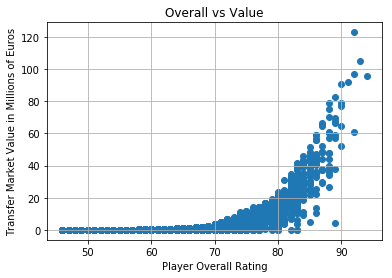

In [28]:
fig,ax=plt.subplots()

Overall=complete['Overall']
Value=complete['Value (M)']
ax.scatter(Overall,Value)
plt.xlabel('Player Overall Rating')
plt.ylabel('Transfer Market Value in Millions of Euros')
plt.title('Overall vs Value')

plt.grid(True)

(array([0.01093635, 0.05704944, 0.12926321, 0.25007047, 0.23056542,
        0.20841085, 0.0844467 , 0.02407126, 0.00456621, 0.0006201 ]),
 array([46. , 50.8, 55.6, 60.4, 65.2, 70. , 74.8, 79.6, 84.4, 89.2, 94. ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'Player Overall Ratings')

Text(0, 0.5, ' Cumulative Percent of Players ')

Text(0.5, 1.0, 'Probability Distribution of Overall Rating')

Text(0.5, 0, 'Player Potential Rating')

Text(0, 0.5, 'Player Overall Rating')

Text(0.5, 1.0, 'Potential vs Overall')

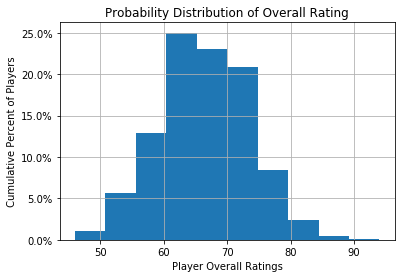

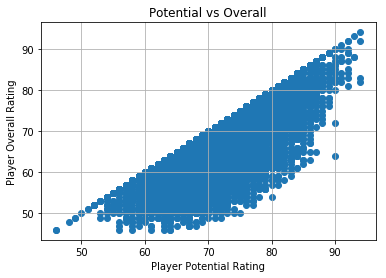

In [29]:
from matplotlib.ticker import PercentFormatter
data = np.array(complete[overall_target])


plt.hist(data, weights=np.ones(len(data)) / len(data))

plt.xlabel("Player Overall Ratings")
plt.ylabel(" Cumulative Percent of Players ")
plt.title("Probability Distribution of Overall Rating")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid(True)



fig,ax=plt.subplots()

Overall=complete['Overall']
Potential=complete['Potential']
ax.scatter(Potential,Overall)
plt.xlabel('Player Potential Rating')
plt.ylabel('Player Overall Rating')
plt.title('Potential vs Overall')

plt.grid(True)

Text(0.5, 0, 'Player Age')

Text(0, 0.5, 'Player Overall Rating')

Text(0.5, 1.0, ' vs Overall')

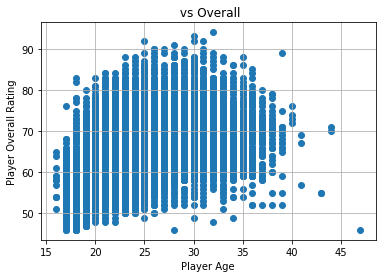

In [30]:
fig,ax=plt.subplots()

Age=complete['age']
Overall=complete['Overall']
ax.scatter(Age,Overall)
plt.xlabel('Player Age')
plt.ylabel('Player Overall Rating')
plt.title(' vs Overall')

plt.grid(True)

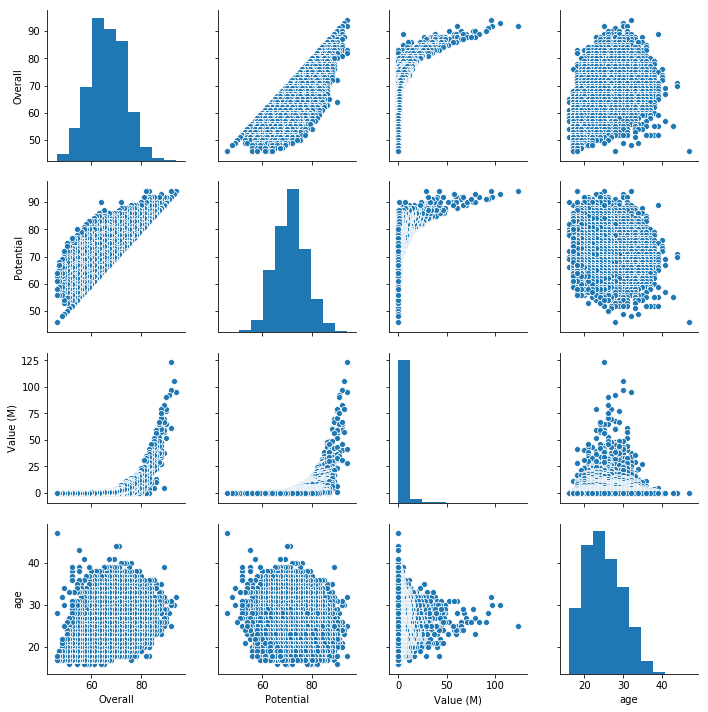

In [32]:
sns.pairplot(complete[['Overall', 'Potential', 'Value (M)', 'age']])

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


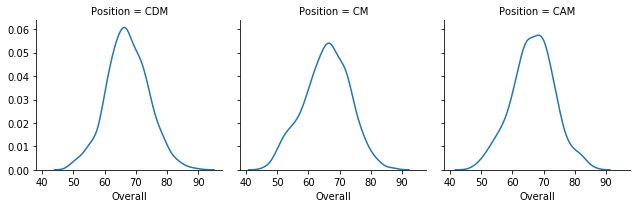

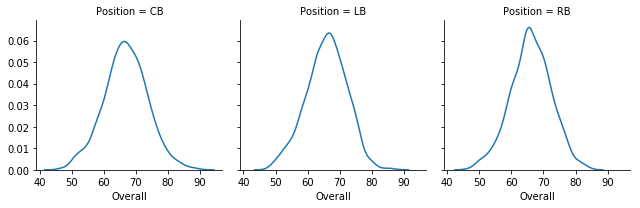

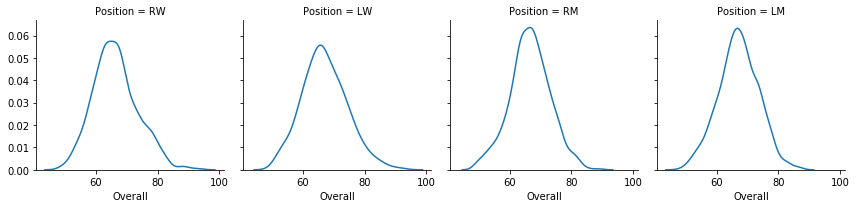

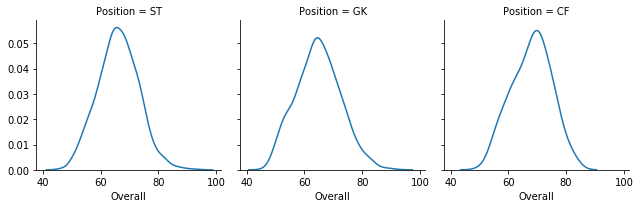

In [33]:
#Distribution of Overall by Position
# center mids
cm = complete[complete['Position'].isin(['CM', 'CDM', 'CAM'])]
cm = sns.FacetGrid(cm, col="Position")
cm.map(sns.kdeplot, "Overall")

#defenders
defend=complete[complete['Position'].isin(['CB', 'RB', 'LB'])]
defend = sns.FacetGrid(defend, col="Position")
defend.map(sns.kdeplot, "Overall")

#wingers
wing=complete[complete['Position'].isin(['LM', 'RM', 'LW', 'RW'])]
wing=sns.FacetGrid(wing, col="Position")
wing.map(sns.kdeplot, "Overall")

#goalies and forwards
gk_and_forwards=complete[complete['Position'].isin(['GK', 'CF', 'ST'])]
gk_and_forwards = sns.FacetGrid(gk_and_forwards, col="Position")
gk_and_forwards.map(sns.kdeplot, "Overall")

Text(0, 0.5, 'Rating')

Text(0.5, 1.0, 'Average Rating by Age')

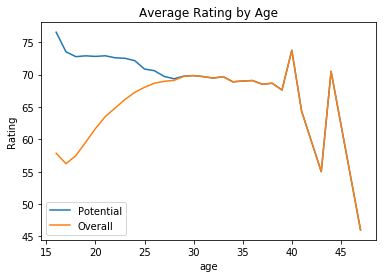

In [34]:
age_pot = complete.groupby(['age'])['Potential'].mean()
age_ovr = complete.groupby(['age'])['Overall'].mean()

df_pot_ovr_age = pd.concat([age_pot, age_ovr], axis=1)

ax = df_pot_ovr_age.plot()
ax.set_ylabel('Rating')
ax.set_title('Average Rating by Age')

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


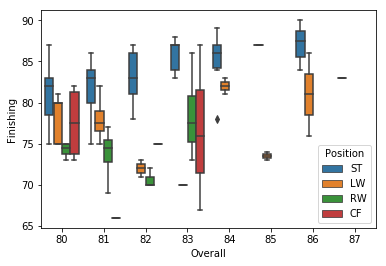

In [35]:
#Finishing by Forwards
#where the range of overall is between 80 and 88
fin = (complete
         .loc[complete['Position'].isin(['ST', 'CF', 'RW', 'LW'])]
         .loc[:, ['Value', 'Overall', 'finishing', 'Position']]
    )
fin = fin[fin["Overall"] >= 80]
fin = fin[fin["Overall"] < 88]
fin['Finishing'] = fin['finishing'].astype(float)

sns.boxplot(x="Overall", y="Finishing", hue='Position', data=fin)

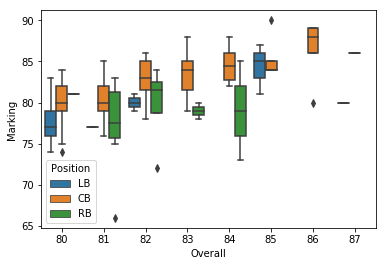

In [36]:
#Marking by Defenders
#where the range of overall is between 80 and 88
fin = (complete
         .loc[complete['Position'].isin(['RB', 'LB', 'CB'])]
         .loc[:, ['Value', 'Overall', 'marking', 'Position']]
    )
fin = fin[fin["Overall"] >= 80]
fin = fin[fin["Overall"] < 88]
fin['Marking'] = fin['marking'].astype(float)

sns.boxplot(x="Overall", y="Marking", hue='Position', data=fin)

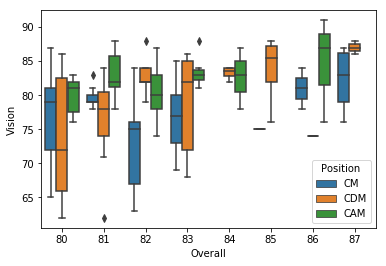

In [37]:
#Vision by Center Mids
#where the range of overall is between 80 and 88
fin = (complete
         .loc[complete['Position'].isin(['CM', 'CDM', 'CAM'])]
         .loc[:, ['Value', 'Overall', 'vision', 'Position']]
    )
fin = fin[fin["Overall"] >= 80]
fin = fin[fin["Overall"] < 88]
fin['Vision'] = fin['vision'].astype(float)

sns.boxplot(x="Overall", y="Vision", hue='Position', data=fin)

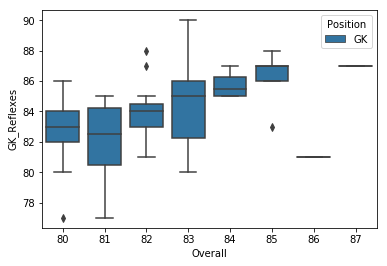

In [38]:
#GK Reflexes 
#where the range of overall is between 80 and 88
fin = (complete
         .loc[complete['Position'].isin(['GK'])]
         .loc[:, ['Value', 'Overall', 'gk_reflexes', 'Position']]
    )
fin = fin[fin["Overall"] >= 80]
fin = fin[fin["Overall"] < 88]
fin['GK_Reflexes'] = fin['gk_reflexes'].astype(float)

sns.boxplot(x="Overall", y="GK_Reflexes", hue='Position', data=fin)

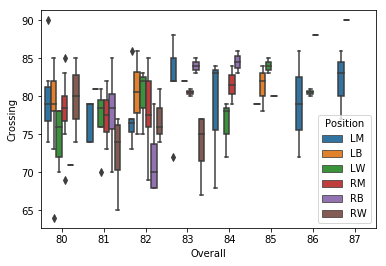

In [39]:
#Crossing by Wide Players
#where the range of overall is between 80 and 88
fin = (complete
         .loc[complete['Position'].isin(['LB', 'RB', 'LW', 'RW', 'LM', 'RM'])]
         .loc[:, ['Value', 'Overall', 'crossing', 'Position']]
    )
fin = fin[fin["Overall"] >= 80]
fin = fin[fin["Overall"] < 88]
fin['Crossing'] = fin['crossing'].astype(float)

sns.boxplot(x="Overall", y="Crossing", hue='Position', data=fin)

<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Age vs Mean Overall/Potential Rating & Value')

Text(0.5, 0, 'Player Age')

Text(0, 0.5, 'Player Overall')

<Figure size 432x288 with 0 Axes>

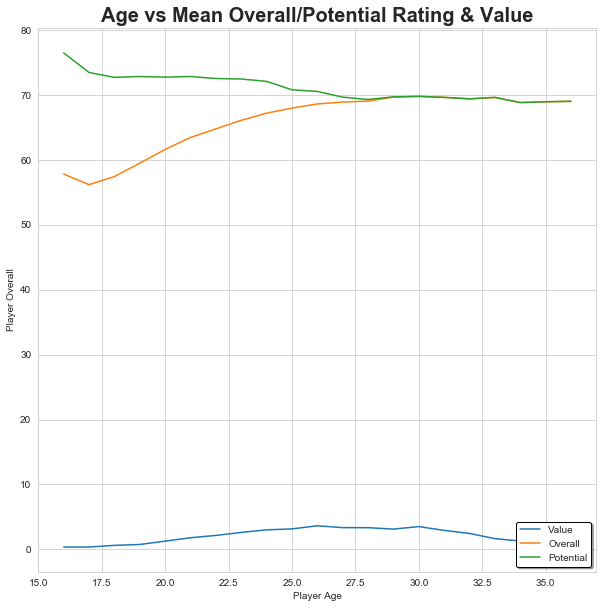

In [42]:
# Selecting players with age smaller then 36
complete36 = complete.loc[complete['age'] <= 36]
# Selecting unique ages from DF
age = complete36.sort_values("age")['age'].unique()
# Selecting average Overall from DF
ovr = complete36.groupby("age")["Overall"].mean().values
# Selecting average potential from DF
potential = complete36.groupby("age")["Potential"].mean().values
# Selecting average value from DF
value=complete36.groupby("age")["Value (M)"].mean().values


plt.figure()
plt.figure(figsize=(10,10))
plt.title('Age vs Mean Overall/Potential Rating & Value', fontsize=20, fontweight='bold')
plt.xlabel('Player Age', fontsize=10)
plt.ylabel('Player Overall', fontsize=10)
sns.set_style("whitegrid")
plt.plot(age, value, label="Value")
plt.plot(age, ovr, label="Overall")
plt.plot(age, potential, label="Potential")
plt.legend(loc=4, prop={'size': 10}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

<Figure size 576x576 with 0 Axes>

Text(0.5, 1.05, 'Pearson correlation of Potential, Value , Age and Overall Rating')

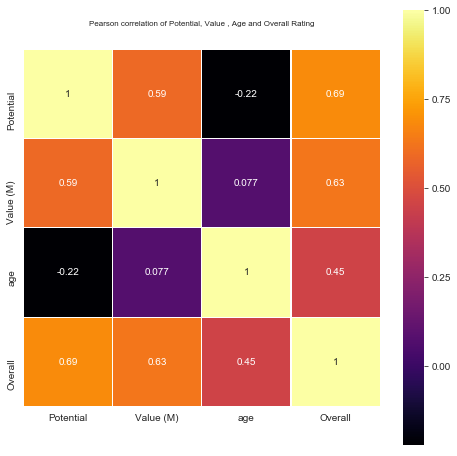

In [43]:
#correlation of age with target variables
corr_variables = complete[["Potential", "Value (M)","age", "Overall"]]
colormap = plt.cm.inferno
plt.figure(figsize=(8,8))
plt.title('Pearson correlation of Potential, Value , Age and Overall Rating', 
          y=1.05, size=8)
sns.heatmap(corr_variables.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

<Figure size 1152x864 with 0 Axes>

Text(0.5, 1.05, 'Pearson correlation of Value, Potential , Age and Player Card Attributes')

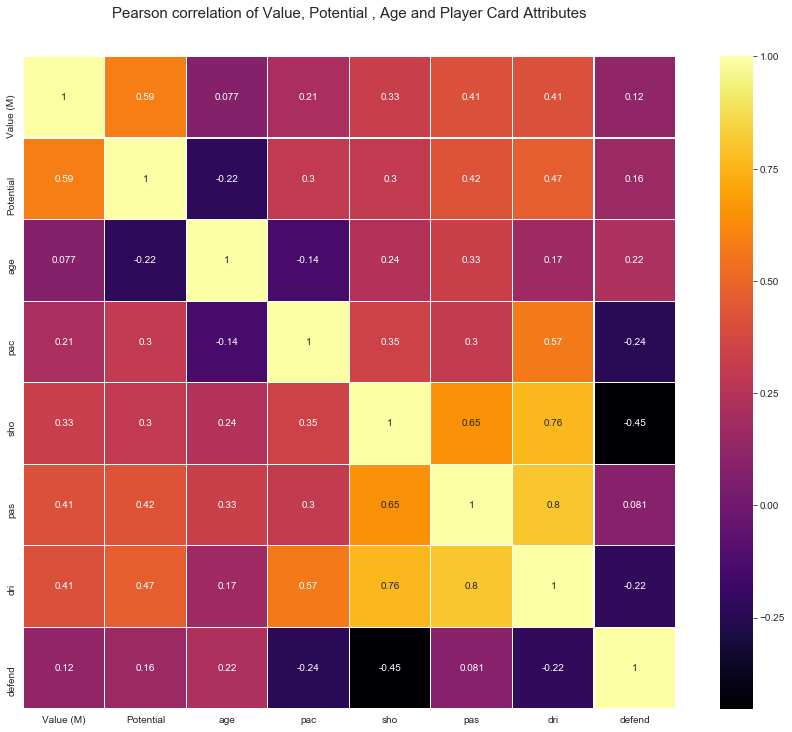

In [44]:
#correlation of basic features with value and potential
corr_variables = complete[["Value (M)", "Potential", "age","pac", "sho", "pas", "dri", "defend"]]
colormap = plt.cm.inferno
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of Value, Potential , Age and Player Card Attributes', 
          y=1.05, size=15)
sns.heatmap(corr_variables.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

<Figure size 1152x1152 with 0 Axes>

Text(0.5, 1.05, 'Pearson correlation of Potential , with Athleticism and Mentality')

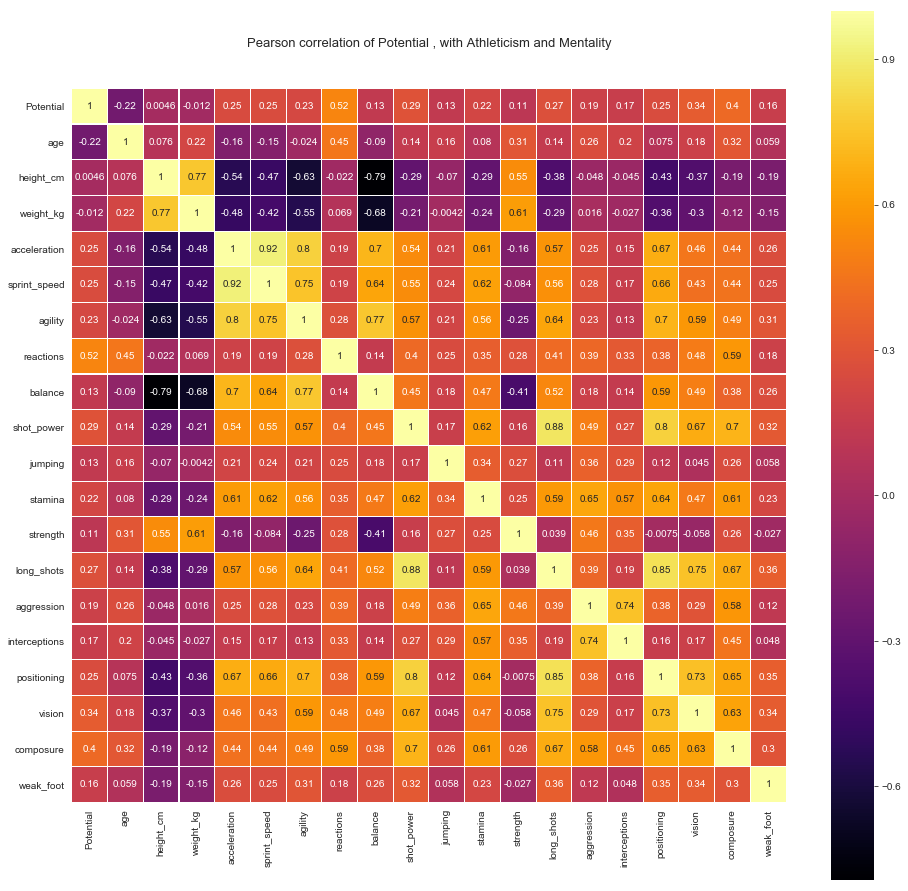

In [45]:
#correlation of all features with potential
features=['Potential','age', 'height_cm', 'weight_kg', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision',  'composure', 'weak_foot']
corr_variables=complete[features]
colormap = plt.cm.inferno
plt.figure(figsize=(16,16))
plt.title('Pearson correlation of Potential , with Athleticism and Mentality', 
          y=1.05, size=13)
sns.heatmap(corr_variables.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Text(0.5, 0, 'Overall Rating')

Text(0.5, 1.0, 'Kernel Density of Overall ')

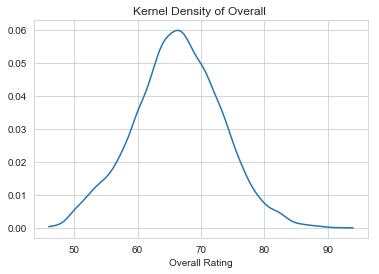

Text(0.5, 0, 'Value')

Text(0.5, 1.0, 'Kernel Density of Value ')

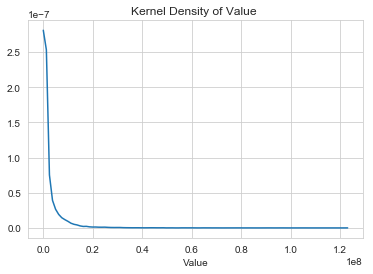

In [47]:
#Kernel Density of Overall Rating
from numpy import linspace
#Kernel Density Estimator
x= complete.Overall
kde = gaussian_kde(x)
dist_space = linspace(min(x), max(x), 100)
plt.xlabel('Overall Rating')
plt.plot(dist_space, kde(dist_space))
plt.title("Kernel Density of Overall ")
plt.show()

#Kernel Density of Value
x= complete.eur_value
kde = gaussian_kde(x)
dist_space = linspace(min(x), max(x), 100)
plt.xlabel('Value')
plt.plot(dist_space, kde(dist_space))
plt.title("Kernel Density of Value ")
plt.show()

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

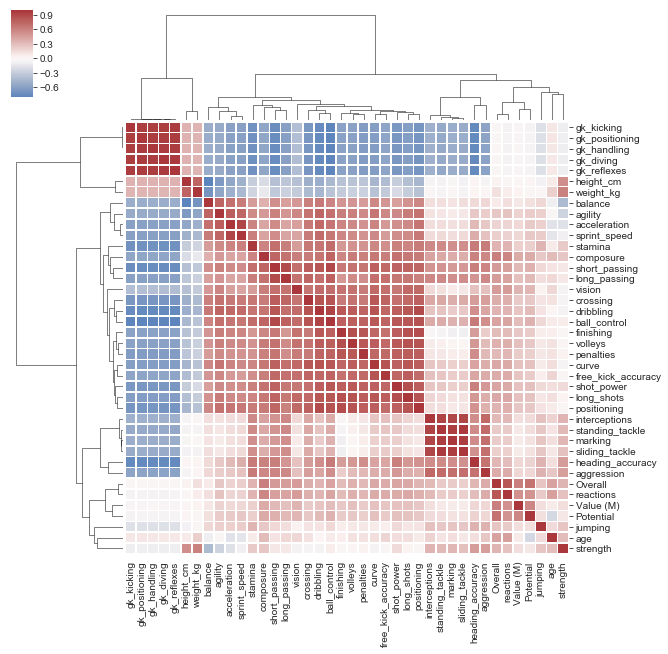

In [48]:
#Cluster Map of Features
#Heatmap: show the correlation between similar features.
# Select a subset of the df
used_variables = ['Overall', 'Potential',
       'Value (M)', 'age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes']
used_columns = (complete.columns.get_level_values(None).isin(used_variables))
df = complete.loc[:, used_columns]

# Draw the full plot
plt.figure(figsize=(16,16))
sns.clustermap(df.corr(), center=0, cmap="vlag", linewidths=.75)

# Applied Statistical Modeling & Learning

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Unsupervised Dimensionality Reduction
</p><br>
<p>
   Description of Method: <br>Unsupervised Dimensionality Reduction is used to reduce the number of random explanatory variables, so as to improve the accuracy of models run on the dataset. Dimensional Reduction adapts the large number of variables into fewer principle variables or components.  
</p>

We begin our analysis with some unsupervised dimmensionality reduction to determine the effect of omitting models from our models.

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Eigenvectors 
[[ 2.02843901e-02  9.07376824e-02 -3.40142262e-01 ...  2.42955802e-02
  -1.16424396e-02 -4.04252606e-03]
 [-1.08675532e-01  1.87911306e-01 -2.51570216e-01 ... -3.54745880e-03
   2.23471915e-02 -1.00085395e-02]
 [-9.25594563e-02  1.80874719e-01 -3.08824513e-01 ... -4.21718616e-03
  -1.04913863e-02  6.34894219e-04]
 ...
 [-1.93941797e-01 -7.20250238e-02 -1.72165656e-01 ... -1.29811679e-02
  -8.06386989e-02 -8.79592893e-01]
 [-1.94269416e-01 -6.98741900e-02 -1.75710490e-01 ... -5.79467503e-03
   2.15473095e-02  2.89958666e-01]
 [-1.94987564e-01 -7.14351566e-02 -1.72916920e-01 ... -1.48850521e-02
   1.23052410e-02  1.80696323e-01]]

Eigenvalues 
[19.17893005  5.34862594  3.09351964  2.07877653  1.34781746  0.82207439
  0.56756527  0.45652984  0.36115814  0.34090087  0.28259051  0.25185916
  0.24481632  0.23815146  0.22931382  0.21347939  0.20367806  0.19309225
  0.18120016  0.15351432  0.13732522  0.13266879  0.12788955  0.10892294
  0.09439369  0.08856606  0.07864995  0.0752

(17739, 37)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.


PCA(copy=True, iterated_power='auto', n_components=37, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

array([0.51832024, 0.14454931, 0.08360393, 0.05617998, 0.03642545,
       0.02221697, 0.01533874, 0.01233795, 0.00976048, 0.00921302,
       0.00763715, 0.00680662, 0.00661628, 0.00643616, 0.00619732,
       0.00576939, 0.0055045 , 0.00521842, 0.00489703, 0.0041488 ,
       0.00371128, 0.00358544, 0.00345628, 0.0029437 , 0.00255104,
       0.00239354, 0.00212555, 0.00203272, 0.00192523, 0.00173078,
       0.00116919, 0.00105116, 0.0010418 , 0.00086691, 0.00084055,
       0.00073266, 0.00066445])

(37,)

,0
0,0.518320
1,0.144549
2,0.083604
3,0.056180
4,0.036425




The cumulative variance explained is: [ 51.8  66.3  74.7  80.3  83.9  86.1  87.6  88.8  89.8  90.7  91.5  92.2
  92.9  93.5  94.1  94.7  95.3  95.8  96.3  96.7  97.1  97.5  97.8  98.1
  98.4  98.6  98.8  99.   99.2  99.4  99.5  99.6  99.7  99.8  99.9 100.
 100.1]


Text(0.5, 0, 'Variables')

Text(0, 0.5, 'Cumulative Variance Explained')

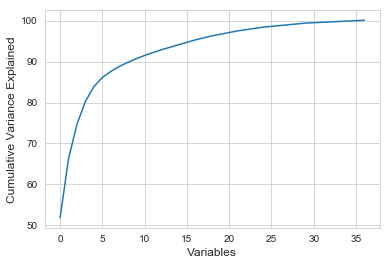

In [49]:
#Our Model
X = complete[attribute_profile]
y_overall=complete[overall_target]

#Exploring PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std=sc.fit_transform(X)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)
eigen_val=pd.DataFrame(eig_vals)
eigen_vec=pd.DataFrame(eig_vecs)



X.shape
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
dta = scale(X)
pca = PCA(n_components=37)
pca.fit(dta)
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
var
var.shape
vardf=pd.DataFrame(var)
vardf.head()
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print("\n\nThe cumulative variance explained is:" ,var1)

plt.plot(var1)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Cumulative Variance Explained', fontsize=12)
plt.grid(True)

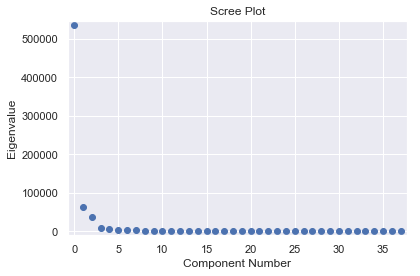

In [50]:
#Scree Plot
dta=pd.concat([y_overall, X], axis=1)
#scree plot
from statsmodels.multivariate.pca import PCA
%matplotlib inline
import seaborn as sns; sns.set()
#Plotting a scree plot
pca_model = PCA(dta.T, standardize=True, demean=True)
fig = pca_model.plot_scree(log_scale=False)

We see that we can explain the vast majority of the variance in our model with roughly 5 varibles, but to account for more than 90% of the cumulative explained variance roughly 10 variables is needed. 

# Regression Analysis of Overall Rating

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Regression on Overall Rating with Player Attributes:OLS and Robust Regression
</p><br>

Description of Method: <br>Regression is used for two main purposes, to predict the value of a dependent variable using one or several independent variables, and which varaibles better explain that dependent variable. 

Here we test one of our most important assumptions needed for our model: Overall is an aggregated calculation that is based on all of the player features in our attribute_profile. This assumption is key for our positional value analysis we will conduct later. Thus, we regress our attribute_profile on overall rating and treat overall rating as a numerical variable.

In [51]:
#We account for heteroskedacity by using Whites Robust Standard Errors 
#define a basic model for overall and the full attribute profile
X = complete[attribute_profile]
X=sm.add_constant(X)
y_overall=complete[overall_target]

#Assuming a heteroskedastic model compute the regression results
OLS_model = sm.OLS(y_overall,X)
OLS_results=OLS_model.fit(cov_type='HC0')
print(OLS_results.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     2560.
Date:                Thu, 06 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:32:10   Log-Likelihood:                -42966.
No. Observations:               17739   AIC:                         8.601e+04
Df Residuals:                   17701   BIC:                         8.630e+04
Df Model:                          37                                         
Covariance Type:                  HC0                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.6296      1

Our model gives us an R-squared of about 85%, thus we can proceed with this critical assumption. On running this model we recieve a warning that we may suffer from multicollinearity, which is an issue we will resolve later. By using the statsmodels library we can also get easy access to informatio for hypothesis testing, variable significance and confidence intervals.


In [52]:
#Robust Linear Regression 
rlm_model = sm.RLM(y_overall, X, M=sm.robust.norms.HuberT())
rlm_results = rlm_model.fit()
print(rlm_results.summary2())

                   Results: Robust linear model
Model:                  RLM                 Df Residuals:    17701 
Dependent Variable:     Overall             Norm:            HuberT
Date:                   2018-12-06 16:39    Scale Est.:      mad   
No. Observations:       17739               Cov. Type:       H1    
Df Model:               37                  Scale:           2.6092
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const               7.5849   1.1347   6.6846 0.0000  5.3610  9.8088
age                 0.0453   0.0059   7.6195 0.0000  0.0336  0.0569
height_cm          -0.0026   0.0062  -0.4229 0.6724 -0.0149  0.0096
weight_kg           0.0263   0.0053   4.9975 0.0000  0.0160  0.0366
crossing            0.0165   0.0028   5.9115 0.0000  0.0110  0.0219
finishing           0.0269   0.0034   7.9567 0.0000  0.0202  0.0335


Here we conduct robust linear regression with Hubers Maximum likelihood estimation to compare the confidence intervals of our features to those we obtained in OLS.

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Regression on Overall Rating with Player Attributes:<br>
    <br>Fitting L1 and L2 Regularization
</p><br>

In [60]:
#Ridge Regression 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
X = complete[attribute_profile]
y=complete[overall_target]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
#fitting several ridge regressions with various sizes of alpha
lr = LinearRegression()
lr.fit(X_train, y_train)
rr_small= Ridge(alpha=0.1)
rr_small.fit(X_train, y_train)
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
rr10 = Ridge(alpha=10) #  comparison with alpha value
rr10.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = ridge.score(X_train,y_train)
Ridge_test_score = ridge.score(X_test, y_test)
Ridge_train_score10 = rr10.score(X_train,y_train)
Ridge_test_score10 = rr10.score(X_test, y_test)
small_ridge_train_score10 = rr_small.score(X_train,y_train)
small_ridge_test_score10 = rr_small.score(X_test, y_test)
#evaluating the three ridge regressions
ysmall_prediction=rr_small.predict(X_test)
yregular_prediction = ridge.predict(X_test)
ylarge_prediction=ridge.predict(X_test)
from sklearn.metrics import r2_score
r2_small=r2_score(y_test, ysmall_prediction) 
r2_regular=r2_score(y_test, yregular_prediction)
r2_large=r2_score(y_test, ylarge_prediction)
print("The R-Squared of the small alpha model is :" ,r2_small)
print("\nThe R-Squared of the default alpha model is :" ,r2_regular)
print("\nThe R-Squared of the large alpha model is :" ,r2_large)
ridge_coef=ridge.coef_
cols=np.array(X.columns)
cols=cols.reshape(37,1)
ridge_coef=ridge_coef.reshape(37,1)
coefs=np.concatenate((cols, ridge_coef), axis=1)
coefs=pd.DataFrame(coefs)
intercept=ridge.intercept_

#From this lets conclude we use the default alpha=1
y_prediction = ridge.predict(X_test)
predictedy=np.concatenate([y_prediction,X_test],axis=1)
predicted=pd.DataFrame(predictedy)
predicted.columns=['Overall','age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes']
#predicted.head()
#predicted.describe().transpose()
#y_test.describe()

#Get the Root Mean Squar Error
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))
print("Root Mean Square Error of test set is:" ,RMSE_test)

y_train_prediction = ridge.predict(X_train)
RMSE_train=sqrt(mean_squared_error(y_true=y_train,y_pred=y_train_prediction))
print("The RMSE of the training data is:" ,RMSE_train)

#K-folds cross validation
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ridge,X,y,cv=5)
scores

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

The R-Squared of the small alpha model is : 0.8458129413678996

The R-Squared of the default alpha model is : 0.8458129475728042

The R-Squared of the large alpha model is : 0.8458129475728042
Root Mean Square Error of test set is: 2.7094674196860966
The RMSE of the training data is: 2.7360819852825267


array([-0.42136809, -3.19847964, -5.93214499, -4.62180961, -0.53326892])

In [62]:
#Utilizing Lasso Regression 
from sklearn.linear_model import Lasso

#default alpha=1
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("\n\nTraining set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

#decrease alpha further
lasso00001 = Lasso(alpha=0.0001, max_iter=1000000).fit(X_train, y_train)
print("\n\nTraining set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))
y_prediction = lasso.predict(X_test)
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))
print("Root Mean Square Error of test set is:" ,RMSE_test)
r2=r2_score(y_test, y_prediction) 
print("The R-Squared of the Model is :" ,r2)

#This r-square is lower because when conducting lasso regression for alpha =1 
#we actually reduce the number of features we have from 37 to 25

#What would happen if we increased alpha above 1?
#Lets try for alpha =5 and alpha=10

lasso5 = Lasso(alpha=5, max_iter=1000000).fit(X_train, y_train)
print("Training set score for 5: {:.2f}".format(lasso5.score(X_train, y_train)))
print("Test set score for 5: {:.2f}".format(lasso5.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso5.coef_ != 0))

lasso10 = Lasso(alpha=10, max_iter=1000000).fit(X_train, y_train)
print("Training set score for 10: {:.2f}".format(lasso10.score(X_train, y_train)))
print("Test set score for 10: {:.2f}".format(lasso10.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso10.coef_ != 0))

#Let us try alpha=8
lasso8 = Lasso(alpha=8, max_iter=1000000).fit(X_train, y_train)
print("Training set score for 8: {:.2f}".format(lasso8.score(X_train, y_train)))
print("Test set score for 8: {:.2f}".format(lasso8.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso8.coef_ != 0))
#This model is a good trade off between a relatively good prediction score while being able to omit some variables
#so lets use alpha=8
y_prediction2 = lasso8.predict(X_test)
lasso_coef=lasso8.coef_
cols=np.array(X.columns)
cols=cols.reshape(37,1)
lasso_coef=lasso_coef.reshape(37,1)
coefs=np.concatenate((cols, lasso_coef), axis=1)
coefs=pd.DataFrame(coefs)
intercept=lasso8.intercept_
print(intercept)
print(coefs)

Training set score: 0.84
Test set score: 0.84
Number of features used: 26


Training set score: 0.85
Test set score: 0.85
Number of features used: 37


Training set score: 0.85
Test set score: 0.85
Number of features used: 37
Root Mean Square Error of test set is: 2.738414237577749
The R-Squared of the Model is : 0.8425008087308197
Training set score for 5: 0.80
Test set score for 5: 0.80
Number of features used: 15
Training set score for 10: 0.72
Test set score for 10: 0.72
Number of features used: 5
Training set score for 8: 0.75
Test set score for 8: 0.75
Number of features used: 10
[29.00742928]
                     0           1
0                  age           0
1            height_cm           0
2            weight_kg           0
3             crossing           0
4            finishing           0
5     heading_accuracy           0
6        short_passing   0.0164898
7              volleys           0
8            dribbling           0
9                curve           0
10  free

Comparing Ridge and Lasso:

(-0.1, 0.45)

Text(0.5, 0, 'Coefficient index')

Text(0, 0.5, 'Coefficient magnitude')

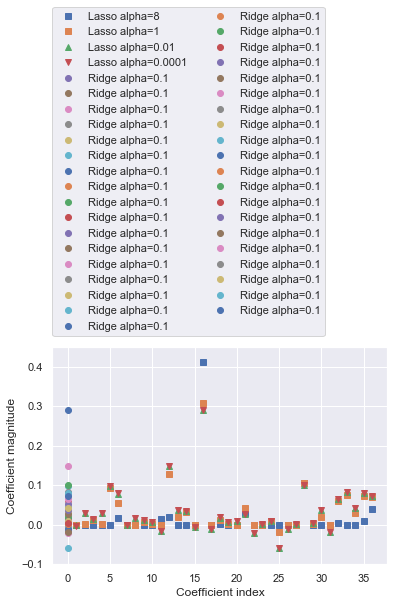

In [63]:
plt.plot(lasso8.coef_, 's', label="Lasso alpha=8")
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")


plt.plot(ridge.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-0.1, 0.45)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

# Positional Value Modeling

Description of Method: <br>

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Positional Value Modeling: Procedure
</p><br>

This approach to finding a value model for this position is based on the assumption that the main determinant to market value is a players overall rating.
<br/>
The approach to find a model that describes value for this position with a reduced number of features is the following:
<br/>
To gain basic insights we conduct simple OLS with robust SE on Overall for this position group with all attributes in the "attribute_profile" list. Then to reduce the amount of variables that matter we fit a lasso regression model on overall. The reason we fit our lasso on overall and not value is that by doing so on overall we see what few features actually make good players, at a given position, good. We compute pearson correlations on the lasso reduced model.When doing lasso regression, we use cross-validation to find the correct alpha to use. After this we choose all the features with a non-zero coefficient, and regardless if their coefficient is non-zero, we include non-soccer attributes such as Age, weight, and height.
<br/> 
Since multicollinearity is likely, we conduct ridge regression on the non-zero coefficients from the lasso model. We use cross validation to also choose the correct alpha for our ridge regression. 
<br/> We then evaluate the reduced model performance, and compare it to the model performance of all the attributes on Value.


<br/>
We conduct gradient boosting regression with grid search cross validation on our lasso reduced model to rank feature importance for a position with respect to value. We then use interaction terms to combine highly correlated features and further reduce our model.
<br> Lastly, we re-estimate our own reduced value model we created and compare it to the original model. 

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Positional Value Modeling: Goal Keeper
</p><br>

# Goal Keeper

In [70]:
data=GK
lnVal=pd.DataFrame((data["Value (M)"]+1).apply(np.log))
lnVal.columns = ['ln_value']
gk_dta = pd.concat([lnVal, data], axis=1)
#Model definition
data=gk_dta
x=data[attribute_profile]
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]


OLS_model = sm.OLS(y1,X)
OLS_results=OLS_model.fit(cov_type='HC0')
#print(OLS_results.summary())
OLS_model2 = sm.OLS(y2,X)
OLS_results2=OLS_model2.fit(cov_type='HC0')
print("\n\nThe adjusted R-squared for the original gk value model is:" ,OLS_results2.rsquared_adj)
print("\nThe model AIC is: " ,OLS_results2.aic)
#Lasso Regression
X_train,X_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

#Lasso Fit (Overall)
lasso = Lasso(alpha=1.0, max_iter=1000000).fit(X_train, y_train)

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler 
X_std = sc.fit_transform(x)
regr_cv = LassoCV(alphas=np.arange(1,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y1)
print("The alpha we should use for lasso regression is:" ,model_cv.alpha_)
#Lasso Coefficients 
y_prediction = lasso.predict(X_test)
lasso_coef=lasso.coef_
cols=np.array(x.columns)
cols=cols.reshape(37,1)
lasso_coef=lasso_coef.reshape(37,1)
coefs=np.concatenate((cols, lasso_coef), axis=1)
coefs=pd.DataFrame(coefs)
intercept=lasso.intercept_
print(intercept)
print(coefs)



The adjusted R-squared for the original gk value model is: 0.4098131400144627

The model AIC is:  10499.852855029098


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warni

The alpha we should use for lasso regression is: 1.0
[2.07617322]
                     0           1
0                  age           0
1            height_cm           0
2            weight_kg           0
3             crossing          -0
4            finishing           0
5     heading_accuracy          -0
6        short_passing           0
7              volleys           0
8            dribbling           0
9                curve           0
10  free_kick_accuracy           0
11        long_passing           0
12        ball_control           0
13        acceleration           0
14        sprint_speed           0
15             agility           0
16           reactions    0.111601
17             balance          -0
18          shot_power           0
19             jumping           0
20             stamina           0
21            strength           0
22          long_shots           0
23          aggression           0
24       interceptions           0
25         positioning  

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.05, 'Pearson correlation of used Features with Targets')

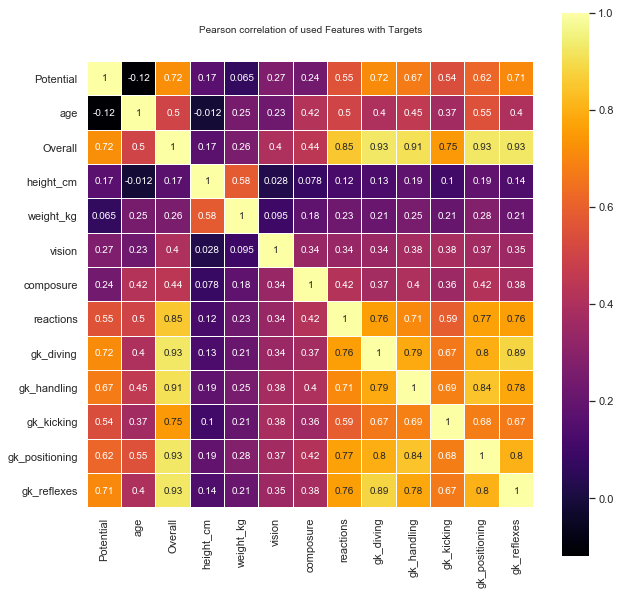

In [71]:
#Correlation between GK features
#Heatmap: show the correlation between similar features.
# Select a subset of the df
used_variables = ['Potential','age','Overall','height_cm', 'weight_kg', 'vision', 'composure', 'reactions' ,'gk_diving', 
               'gk_handling', 'gk_kicking','gk_positioning', 'gk_reflexes']
corr_variables = gk_dta[used_variables]
colormap = plt.cm.inferno
plt.figure(figsize=(10,10))
plt.title('Pearson correlation of used Features with Targets', 
          y=1.05, size=10)
sns.heatmap(corr_variables.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [72]:
#Reduced Model
features=lasso.coef_
np.nonzero(features)
gk_features_used=['age','height_cm', 'weight_kg','vision', 'composure', 'reactions' ,'gk_diving', 
               'gk_handling', 'gk_kicking','gk_positioning', 'gk_reflexes']

data=gk_dta
x=data[gk_features_used]
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
x.shape
#Finding the best alpha for ridge regression for value
x=data[gk_features_used]
y2=data[value_target]
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
scaler = StandardScaler()
X_std = scaler.fit_transform(x)
regr_cv = RidgeCV(alphas=np.arange(0.001,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y2)
model_cv.alpha_
print("The alpha we should use for ridge regression is:" ,model_cv.alpha_)
#Finding the best alpha for ridge regression for  elasticity of value
x2=data[gk_features_used]
y3=data[ln_value]
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
scaler = StandardScaler()
X_std2 = scaler.fit_transform(x2)
regr_cv2 = RidgeCV(alphas=np.arange(0.001,9999.999))
# Fit the linear regression
model_cv2 = regr_cv.fit(X_std2, y3)
model_cv2.alpha_
print("The alpha we should use for ridge regression is:" ,model_cv2.alpha_)

(array([16, 26, 28, 32, 33, 34, 35, 36]),)

(1997, 11)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


43.00099999999999

The alpha we should use for ridge regression is: 43.00099999999999


/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


17.000999999999998

The alpha we should use for ridge regression is: 17.000999999999998


In [73]:
#Ridge regression for value
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
#Ridge fit
ridge = Ridge(alpha=43.001)
ridge.fit(X_train, y_train)
y_prediction = ridge.predict(X_test)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
cols=cols.reshape(11,1)
ridge_coef=ridge_coef.reshape(11,1)
ridge_coefs=np.concatenate((cols, ridge_coef), axis=1)
ridge_coefs=pd.DataFrame(ridge_coefs)
ridge_intercept=ridge.intercept_
print(ridge_intercept)
print(ridge_coefs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Ridge(alpha=43.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

[-13.14542092]
                 0            1
0              age    -0.237331
1        height_cm   -0.0300758
2        weight_kg    0.0201663
3           vision   0.00894544
4        composure    0.0325005
5        reactions    0.0331193
6        gk_diving     0.057807
7      gk_handling     0.146235
8       gk_kicking  0.000906135
9   gk_positioning    0.0668935
10     gk_reflexes    0.0620717


In [74]:
#Ridge regression for elasticity
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
#Ridge fit
ridge = Ridge(alpha=17.01)
ridge.fit(X_train, y_train)
y_prediction = ridge.predict(X_test)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
cols=cols.reshape(11,1)
ridge_coef=ridge_coef.reshape(11,1)
ridge_coefs=np.concatenate((cols, ridge_coef), axis=1)
ridge_coefs=pd.DataFrame(ridge_coefs)
ridge_intercept=ridge.intercept_
print(ridge_intercept)
print(ridge_coefs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Ridge(alpha=17.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

[-13.12306795]
                 0            1
0              age    -0.237615
1        height_cm   -0.0302307
2        weight_kg    0.0202533
3           vision    0.0089393
4        composure    0.0325238
5        reactions    0.0331278
6        gk_diving    0.0577731
7      gk_handling     0.146363
8       gk_kicking  0.000856266
9   gk_positioning     0.066962
10     gk_reflexes    0.0620545


In [77]:
#Model Eval for value
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
#Ridge fit
ridge = Ridge(alpha=43.001)
ridge.fit(X_train, y_train)
Ridge_train_score = ridge.score(X_train,y_train)
Ridge_test_score = ridge.score(X_test, y_test)
y_prediction = ridge.predict(X_test)
print("The training and test scores respectively are: " ,Ridge_train_score, "and" ,Ridge_test_score)
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))
print("\n Root Mean Square Error of test set is:" ,RMSE_test)
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ridge,x,y2,cv=5)
print("\n K-folds cross validation scores:" ,scores)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Ridge(alpha=43.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

The training and test scores respectively are:  0.4172929600398208 and 0.3783843942205314

 Root Mean Square Error of test set is: 3.9606127253424033

 K-folds cross validation scores: [-3.33025712e-01 -1.78110273e+01 -7.33523812e+01 -1.63418222e+02
 -1.09703462e+04]



Model Report
RMSE : 0.3608
CV Score : Mean - 1.42 | Std - 3.253 | Min - 0.06488 | Max - 11.13


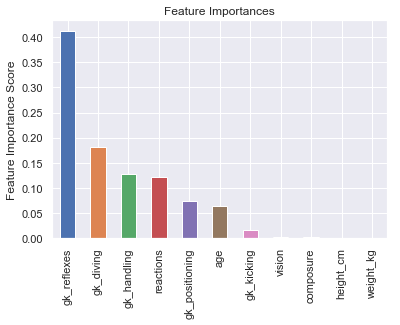

In [82]:
#Gradient Boosting Regression on the Reduced Model for Value
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import recall_score
gk_reduced=['Value (M)','age','height_cm', 'weight_kg','vision', 'composure', 'reactions' ,'gk_diving', 
               'gk_handling', 'gk_kicking','gk_positioning', 'gk_reflexes']
dta=GK[gk_reduced]

def modelfit(alg, dtrain, features, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
    
    alg.fit(dtrain[features],dtrain["Value (M)"] )
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[features])

    #Perform cross-validation:
    cv_score =  cross_val_score(alg, dtrain[features], dtrain["Value (M)"], cv=cv_folds,
                                                scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain["Value (M)"], dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),
                                                                             np.std(cv_score),np.min(cv_score),
                                                                              np.max(cv_score)))
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, features).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

features = [i for i in dta.columns if i != "Value (M)"]
target = "Value (M)"
gbm0 = GradientBoostingRegressor(random_state=7)
modelfit(gbm0, dta, features)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': [700, 710, 720, 730, 740]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

(<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise-deprecating',
        estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
        fit_params=None, iid=False, n_jobs=4,
        param_grid={'n_estimators': [700, 710, 720, 730, 740]},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring='neg_mean_squared_error', verbose=0)>,
 {'n_estimators': 730},
 -12.52598819477318)


Model Report
RMSE : 1.388
CV Score : Mean - 1.465 | Std - 3.222 | Min - 0.1063 | Max - 11.06


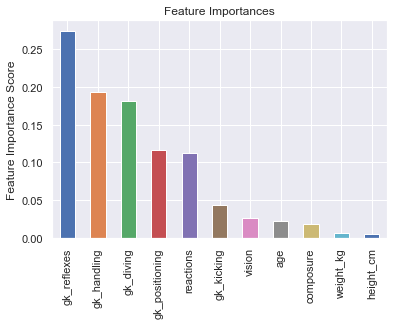

In [83]:
#Feature Ranking with GridSearch CV
estimators = [x for x in range(700,750,10)]
param_test1 = {'n_estimators':estimators}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch1.fit(dta[features],dta["Value (M)"])

gsearch1.score, gsearch1.best_params_, gsearch1.best_score_
modelfit(gsearch1.best_estimator_, dta, features)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


                            OLS Regression Results                            
Dep. Variable:              Value (M)   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     55.22
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           7.35e-54
Time:                        18:11:18   Log-Likelihood:                -4841.2
No. Observations:                1997   AIC:                             9694.
Df Residuals:                    1991   BIC:                             9728.
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.5912      0.061     26.021      

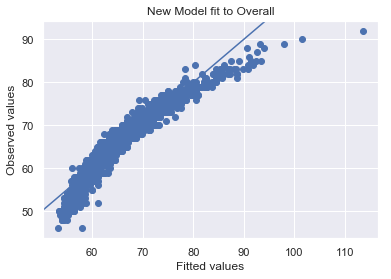

In [84]:
#Create our New Model with Interaction Terms
data=gk_dta
x=data[attribute_profile]
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
data=gk_dta
def gk_skills (row):
    return row['gk_reflexes'] * row['gk_handling'] * row['gk_diving'] *row['gk_positioning'] *row['gk_kicking']
def gk_ath_ment (row):
    return row['acceleration'] *row['jumping'] *row['reactions'] * row['strength'] *row['aggression'] * row['composure'] * row['vision']

def gk_attack (row):
    return row['long_passing'] * row['ball_control'] *row['short_passing']
def gk_phy (row):
    return row['height_cm'] * row['weight_kg']


data['gk_skills'] = data.apply(gk_skills, axis=1)
data['gk_ath_ment']= data.apply(gk_ath_ment, axis=1)
data['gk_attack']= data.apply(gk_attack, axis=1)
data['gk_phy']= data.apply(gk_phy, axis=1)
features=['age', 'gk_skills', 'gk_ath_ment' , 'gk_attack', 'gk_phy']
x=data[features]
#We must now scale the features
x =pd.DataFrame(scaler.fit_transform(x))
x.columns= ['age', 'gk_skills', 'gk_ath_ment' , 'gk_attack', 'gk_phy']
#We have now addressed the issue of endogenity by including interaction terms
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
mod=sm.OLS(y1,X)
res=mod.fit(cov_type='HC0')
yhat = res.fittedvalues
OLS_model = sm.OLS(y2,X)
OLS_results=OLS_model.fit(cov_type='HC0')
print(OLS_results.summary())
print(res.aic)
#Plot of y-hat for y-true on the reduced model for overall rating
from statsmodels.graphics.api import abline_plot
fig, ax = plt.subplots()
ax.scatter(yhat, y1)
line_fit = sm.OLS(y1, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('New Model fit to Overall')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');


Not only have we addressed issues of multicollinearity but we have increased the r-squared form 38% to 60% with our new model.

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Positional Value Modeling: Center Back
</p><br>

# Center Backs

In [85]:
data=CB
lnVal=pd.DataFrame((data["Value (M)"]+1).apply(np.log))
lnVal.columns = ['ln_value']
cb_dta = pd.concat([lnVal, data], axis=1)

data=cb_dta
x=data[attribute_profile]
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
#OLS for Overall
OLS_model = sm.OLS(y1,X)
OLS_results=OLS_model.fit(cov_type='HC0')
print("The R-squared for the attributes with overall is:" ,OLS_results.rsquared_adj)
OLS_model2 = sm.OLS(y2,X)
OLS_results2=OLS_model2.fit(cov_type='HC0')
print("\n\nThe adjusted R-squared for the original CB value model is:" ,OLS_results2.rsquared_adj)
print("\nThe model AIC is: " ,OLS_results2.aic)

#Lasso Regression
X_train,X_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

#Lasso Fit (Overall)
#lasso = Lasso(alpha=1.0, max_iter=1000000).fit(X_train, y_train)

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
X_std = scaler.fit_transform(x)
regr_cv = LassoCV(alphas=np.arange(1,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y1)
print("The alpha we should use for lasso regression is:" ,model_cv.alpha_)

#Lasso Coefficients 
y_prediction = lasso.predict(X_test)
lasso_coef=lasso.coef_
cols=np.array(x.columns)
cols=cols.reshape(37,1)
lasso_coef=lasso_coef.reshape(37,1)
coefs=np.concatenate((cols, lasso_coef), axis=1)
coefs=pd.DataFrame(coefs)
intercept=lasso.intercept_
print("the intercept is:" ,intercept)
print(coefs)
coefs.columns

The R-squared for the attributes with overall is: 0.9767396881639706


The adjusted R-squared for the original CB value model is: 0.5190537115283163

The model AIC is:  18373.33296177382


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warni

The alpha we should use for lasso regression is: 1.0
the intercept is: [2.07617322]
                     0           1
0                  age           0
1            height_cm           0
2            weight_kg           0
3             crossing          -0
4            finishing           0
5     heading_accuracy          -0
6        short_passing           0
7              volleys           0
8            dribbling           0
9                curve           0
10  free_kick_accuracy           0
11        long_passing           0
12        ball_control           0
13        acceleration           0
14        sprint_speed           0
15             agility           0
16           reactions    0.111601
17             balance          -0
18          shot_power           0
19             jumping           0
20             stamina           0
21            strength           0
22          long_shots           0
23          aggression           0
24       interceptions           0
25    

RangeIndex(start=0, stop=2, step=1)

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.05, 'Pearson correlation of used Features with Targets')

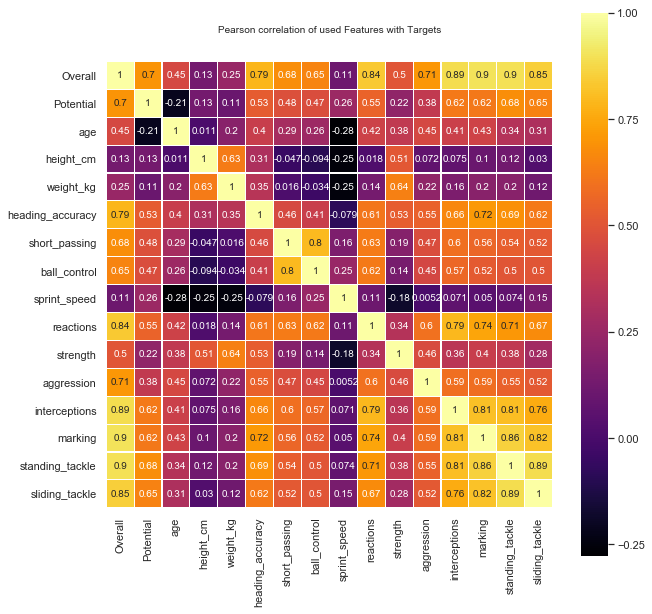

In [86]:
#Pearson Correlation
used_variables = ['Overall','Potential','age','height_cm', 'weight_kg','heading_accuracy', 'short_passing' ,'ball_control', 
               'sprint_speed', 'reactions','strength', 'aggression',
                 'interceptions', 'marking', 'standing_tackle', 'sliding_tackle']
corr_variables = data[used_variables]
colormap = plt.cm.inferno
plt.figure(figsize=(10,10))
plt.title('Pearson correlation of used Features with Targets', 
          y=1.05, size=10)
sns.heatmap(corr_variables.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [87]:
#Preparing a ridge model
features=lasso.coef_
indices=np.nonzero(features)
np.take(features, indices)
cb_features_used=['age','height_cm', 'weight_kg','heading_accuracy', 'short_passing' ,'ball_control', 
               'sprint_speed', 'reactions','strength', 'aggression',
                 'interceptions', 'marking', 'standing_tackle', 'sliding_tackle']

data=cb_dta
x=data[cb_features_used]
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
x.shape

#Finding the best alpha for ridge regression for value
x=data[cb_features_used]
y2=data[value_target]

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
scaler = StandardScaler()
X_std = scaler.fit_transform(x)
regr_cv = RidgeCV(alphas=np.arange(0.001,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y2)
model_cv.alpha_
print("The alpha we should use for ridge regression is:" ,model_cv.alpha_)

array([[0.11160108, 0.00040904, 0.00131157, 0.19854295, 0.2068868 ,
        0.04369794, 0.2136255 , 0.20766875]])

(3589, 14)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


52.00099999999999

The alpha we should use for ridge regression is: 52.00099999999999


In [89]:
#Fitting ridge regression to the reduced model
#Note we use the suggested alpha of 52.01
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
#Ridge fit: Finding out what alpha to use for ridge
ridge = Ridge(alpha=52.01)
ridge.fit(X_train, y_train)
y_prediction = ridge.predict(X_test)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
cols=cols.reshape(14,1)
ridge_coef=ridge_coef.reshape(14,1)
ridge_coefs=np.concatenate((cols, ridge_coef), axis=1)
ridge_coefs=pd.DataFrame(ridge_coefs)
ridge_intercept=ridge.intercept_
print(ridge_intercept)
print(ridge_coefs)
#Model Evaluation for Value
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
Ridge_train_score = ridge.score(X_train,y_train)
Ridge_test_score = ridge.score(X_test, y_test)
y_prediction = ridge.predict(X_test)
print("The training and test scores respectively are: " ,Ridge_train_score, "and" ,Ridge_test_score)
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))
print("\n Root Mean Square Error of test set is:" ,RMSE_test)
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ridge,X,y2,cv=5)
print("\n K-folds cross validation scores:" ,scores)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Ridge(alpha=52.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

[-30.75542114]
                   0           1
0                age   -0.232848
1          height_cm   0.0225915
2          weight_kg   0.0279878
3   heading_accuracy    0.050792
4      short_passing -0.00277465
5       ball_control   0.0193687
6       sprint_speed   0.0180922
7          reactions     0.10354
8           strength  0.00691043
9         aggression   0.0016774
10     interceptions   0.0663203
11           marking -0.00227414
12   standing_tackle    0.099245
13    sliding_tackle    0.142504
The training and test scores respectively are:  0.5197743531127669 and 0.48786044848023613

 Root Mean Square Error of test set is: 3.3666170779309024

 K-folds cross validation scores: [-5.16298889e-01 -6.92960691e+00 -4.90664710e+01 -8.46186913e+01
 -2.73683812e+03]



Model Report
RMSE : 0.649
CV Score : Mean - 1.516 | Std - 2.867 | Min - 0.1413 | Max - 10.02


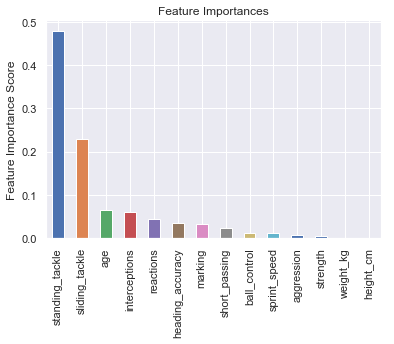

In [90]:
#Gradient Boosting Regression
cb_reduced=['Value (M)','age','height_cm', 'weight_kg','heading_accuracy', 'short_passing' ,'ball_control', 
               'sprint_speed', 'reactions','strength', 'aggression',
                 'interceptions', 'marking', 'standing_tackle', 'sliding_tackle']
dta=CB[cb_reduced]
def modelfit(alg, dtrain, features, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
    
    alg.fit(dtrain[features],dtrain["Value (M)"] )
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[features])

    #Perform cross-validation:
    cv_score =  cross_val_score(alg, dtrain[features], dtrain["Value (M)"], cv=cv_folds,
                                                scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain["Value (M)"], dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),
                                                                             np.std(cv_score),np.min(cv_score),
                                                                              np.max(cv_score)))
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, features).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        



features = [i for i in dta.columns if i != "Value (M)"]
target = "Value (M)"
gbm0 = GradientBoostingRegressor(random_state=7)
modelfit(gbm0, dta, features)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': [700, 710, 720, 730, 740]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

(<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise-deprecating',
        estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
        fit_params=None, iid=False, n_jobs=4,
        param_grid={'n_estimators': [700, 710, 720, 730, 740]},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring='neg_mean_squared_error', verbose=0)>,
 {'n_estimators': 740},
 -11.265483305113396)


Model Report
RMSE : 0.7678
CV Score : Mean - 1.487 | Std - 3.009 | Min - 0.1217 | Max - 10.44


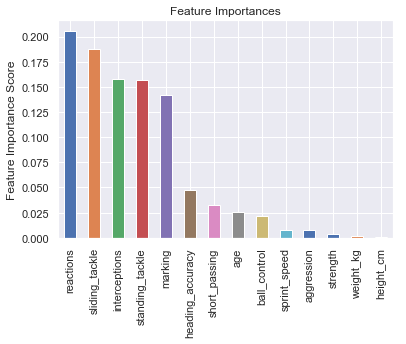

In [91]:
#Tuning with GridSearch
estimators = [x for x in range(700,750,10)]
param_test1 = {'n_estimators':estimators}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch1.fit(dta[features],dta["Value (M)"])

gsearch1.score, gsearch1.best_params_, gsearch1.best_score_
modelfit(gsearch1.best_estimator_, dta, features)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  'rank is %d' % (J, J_), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:              Value (M)   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     149.5
Date:                Thu, 06 Dec 2018   Prob (F-statistic):          1.53e-144
Time:                        18:24:15   Log-Likelihood:                -8550.3
No. Observations:                3589   AIC:                         1.711e+04
Df Residuals:                    3583   BIC:                         1.715e+04
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.1994      0.044     50.277   

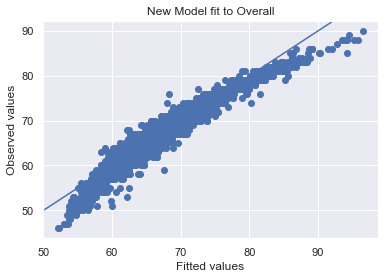

In [92]:
#New CB Model
#Create our New Model with Interaction Terms
data=cb_dta
def cb_skills (row):
    return row['interceptions'] * row['marking'] * row['standing_tackle'] *row['sliding_tackle']
def cb_ath (row):
    return row['sprint_speed'] *row['jumping'] *row['reactions'] * row['strength']

def cb_mentality (row):
    return row['aggression'] * row['composure'] * row['reactions']
def cb_attack (row):
    return row['short_passing'] * row['ball_control'] *row['heading_accuracy']
def cb_phy (row):
    return row['height_cm'] * row['weight_kg']


data['cb_skills'] = data.apply(cb_skills, axis=1)
data['cb_ath']= data.apply(cb_ath, axis=1)
data['cb_mentality']= data.apply(cb_ath, axis=1)
data['cb_attack']= data.apply(cb_attack, axis=1)
data['cb_phy']= data.apply(cb_phy, axis=1)
features=['age', 'cb_skills', 'cb_ath', 'cb_mentality', 'cb_attack', 'cb_phy']
x=data[features]
#We must now scale the features
x =pd.DataFrame(scaler.fit_transform(x))
x.columns= ['age', 'cb_skills', 'cb_ath' ,'cb_mentality', 'cb_attack', 'cb_phy']
#We have now addressed the issue of endogenity by including interaction terms
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
mod=sm.OLS(y1,X)
res=mod.fit(cov_type='HC0')
yhat = res.fittedvalues
OLS_model = sm.OLS(y2,X)
OLS_results=OLS_model.fit(cov_type='HC0')
print(OLS_results.summary())
print(res.aic)
#Plot of y-hat for y-true on the reduced model for overall rating
from statsmodels.graphics.api import abline_plot
fig, ax = plt.subplots()
ax.scatter(yhat, y1)
line_fit = sm.OLS(y1, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('New Model fit to Overall')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');


Our new model is an improvement over the lasso reduced model as the score has improved from 48% to 66%.

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Positional Value Modeling: Full Back
</p><br>

# Full Backs

In [93]:
data=FB
lnVal=pd.DataFrame((data["Value (M)"]+1).apply(np.log))
lnVal.columns = ['ln_value']
fb_dta = pd.concat([lnVal, data], axis=1)

data=fb_dta
x=data[attribute_profile]
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
#OLS for Overall
OLS_model = sm.OLS(y1,X)
OLS_results=OLS_model.fit(cov_type='HC0')
print("The R-squared for the attributes with overall is:" ,OLS_results.rsquared_adj)
OLS_model2 = sm.OLS(y2,X)
OLS_results2=OLS_model2.fit(cov_type='HC0')
print("\n\nThe adjusted R-squared for the original CB value model is:" ,OLS_results2.rsquared_adj)
print("\nThe model AIC is: " ,OLS_results2.aic)

#Lasso Regression
X_train,X_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

#Lasso Fit (Overall)
lasso = Lasso(alpha=1.0, max_iter=1000000).fit(X_train, y_train)

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
X_std = scaler.fit_transform(x)
regr_cv = LassoCV(alphas=np.arange(1,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y1)
print("The alpha we should use for lasso regression is:" ,model_cv.alpha_)
lasso = Lasso(alpha=1.0, max_iter=1000000).fit(X_train, y_train)
#Lasso Coefficients 
y_prediction = lasso.predict(X_test)
lasso_coef=lasso.coef_
cols=np.array(x.columns)
cols=cols.reshape(37,1)
lasso_coef=lasso_coef.reshape(37,1)
coefs=np.concatenate((cols, lasso_coef), axis=1)
coefs=pd.DataFrame(coefs)
intercept=lasso.intercept_
print("the intercept is:" ,intercept)
print(coefs)

The R-squared for the attributes with overall is: 0.9211686117206395


The adjusted R-squared for the original CB value model is: 0.49884282137975655

The model AIC is:  19821.193103331858


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warni

The alpha we should use for lasso regression is: 1.0
the intercept is: [9.83169515]
                     0            1
0                  age            0
1            height_cm            0
2            weight_kg            0
3             crossing    0.0296561
4            finishing   0.00264624
5     heading_accuracy    0.0724916
6        short_passing    0.0911999
7              volleys            0
8            dribbling            0
9                curve            0
10  free_kick_accuracy            0
11        long_passing  0.000705052
12        ball_control    0.0838473
13        acceleration   0.00947536
14        sprint_speed    0.0627873
15             agility            0
16           reactions      0.14768
17             balance           -0
18          shot_power   0.00867427
19             jumping  5.82115e-05
20             stamina    0.0440155
21            strength    0.0189905
22          long_shots            0
23          aggression    0.0030194
24       interce

<Figure size 1080x1080 with 0 Axes>

Text(0.5, 1.05, 'Pearson correlation of used Features with Targets')

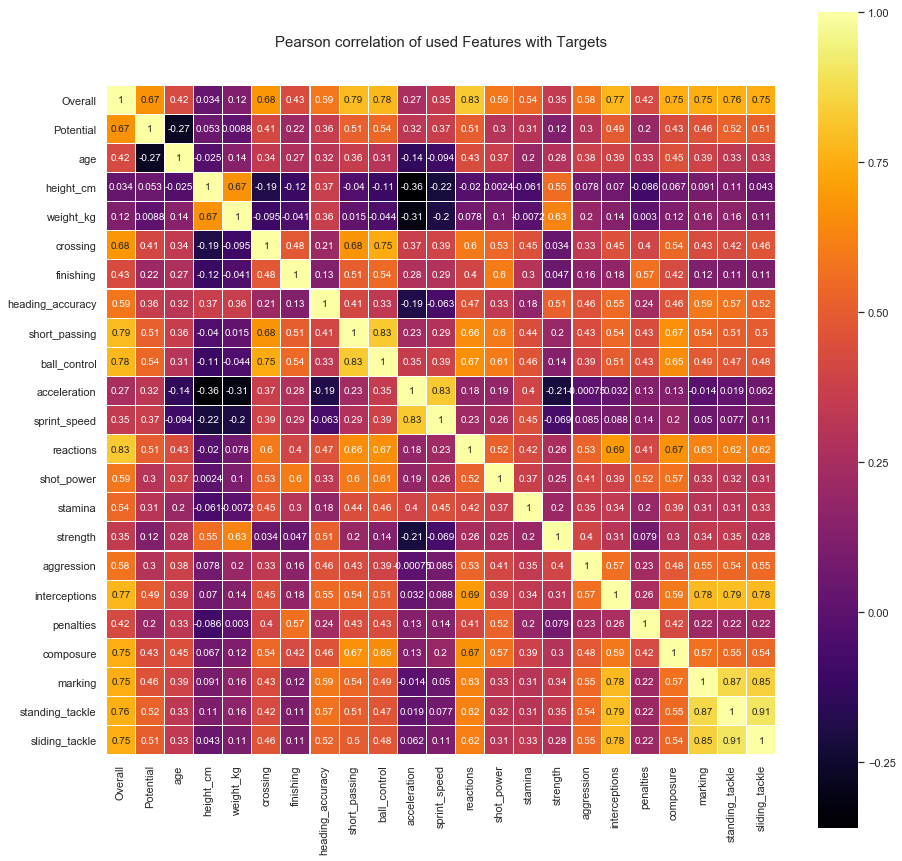

In [94]:
used_variables = ['Overall','Potential',  'age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'ball_control', 'acceleration', 'sprint_speed','reactions',  'shot_power', 'stamina',
       'strength',  'aggression', 'interceptions', 'penalties', 'composure', 'marking', 'standing_tackle','sliding_tackle']
corr_variables = data[used_variables]
colormap = plt.cm.inferno
plt.figure(figsize=(15,15))
plt.title('Pearson correlation of used Features with Targets', 
          y=1.05, size=15)
sns.heatmap(corr_variables.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [95]:
#Preparing a ridge model
features=lasso.coef_
indices=np.nonzero(features)
np.take(features, indices)
fb_features_used=['age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 
        'ball_control', 'acceleration', 'sprint_speed',
       'reactions',  'shot_power', 'stamina',
       'strength',  'aggression', 'interceptions', 
        'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle']

data=fb_dta
x=data[fb_features_used]
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
x.shape
#What alpha should we use
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
scaler = StandardScaler()
X_std = scaler.fit_transform(x)
regr_cv = RidgeCV(alphas=np.arange(0.001,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y2)
model_cv.alpha_
print("The alpha we should use for ridge regression is:" ,model_cv.alpha_)
#Fitting ridge regression to the reduced model
#Note we use the suggested alpha of 47.01
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
#Ridge fit: Finding out what alpha to use for ridge
ridge = Ridge(alpha=47.01)
ridge.fit(X_train, y_train)
y_prediction = ridge.predict(X_test)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
cols=cols.reshape(21,1)
ridge_coef=ridge_coef.reshape(21,1)
ridge_coefs=np.concatenate((cols, ridge_coef), axis=1)
ridge_coefs=pd.DataFrame(ridge_coefs)
ridge_intercept=ridge.intercept_
print(ridge_intercept)
print(ridge_coefs)


array([[2.96560690e-02, 2.64623865e-03, 7.24915843e-02, 9.11999457e-02,
        7.05052413e-04, 8.38472739e-02, 9.47535938e-03, 6.27873387e-02,
        1.47680244e-01, 8.67427415e-03, 5.82115337e-05, 4.40155481e-02,
        1.89904876e-02, 3.01940311e-03, 8.34099959e-02, 4.82689489e-03,
        4.55749094e-02, 4.05975224e-02, 6.96804861e-02, 7.45425449e-02]])

(4443, 21)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


47.00099999999999

The alpha we should use for ridge regression is: 47.00099999999999


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Ridge(alpha=47.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

[-12.58034089]
                   0           1
0                age   -0.232369
1          height_cm  -0.0245367
2          weight_kg  0.00689697
3           crossing   0.0159733
4          finishing   0.0234055
5   heading_accuracy   0.0274091
6      short_passing  0.00803264
7       ball_control   0.0119604
8       acceleration -0.00351722
9       sprint_speed   0.0125693
10         reactions    0.103654
11        shot_power  -0.0019431
12           stamina   0.0220401
13          strength   0.0164439
14        aggression  -0.0104205
15     interceptions   0.0453487
16         penalties   0.0097418
17         composure   0.0261696
18           marking  -0.0276853
19   standing_tackle   0.0610693
20    sliding_tackle   0.0507346


In [96]:
#Model Evaluation for Value
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
Ridge_train_score = ridge.score(X_train,y_train)
Ridge_test_score = ridge.score(X_test, y_test)
y_prediction = ridge.predict(X_test)
print("The training and test scores respectively are: " ,Ridge_train_score, "and" ,Ridge_test_score)
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))
print("\n Root Mean Square Error of test set is:" ,RMSE_test)
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ridge,X,y2,cv=5)
print("\n K-folds cross validation scores:" ,scores)

The training and test scores respectively are:  0.5115982923524287 and 0.4666374868435317

 Root Mean Square Error of test set is: 2.397975080927799

 K-folds cross validation scores: [  0.40175035 -30.27929944   0.47428942 -23.25740157   0.16927888]



Model Report
RMSE : 0.5426
CV Score : Mean - 0.7949 | Std - 0.6018 | Min - 0.169 | Max - 2.077


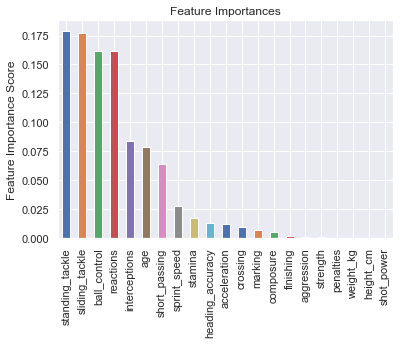

In [98]:
#Gradient Boosting Regression
FB=FB

fb_reduced=['Value (M)',  'age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 
        'ball_control', 'acceleration', 'sprint_speed',
       'reactions',  'shot_power', 'stamina',
       'strength',  'aggression', 'interceptions', 
        'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle']
dta=FB[fb_reduced]
def modelfit(alg, dtrain, features, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
    
    alg.fit(dtrain[features],dtrain["Value (M)"] )
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[features])

    #Perform cross-validation:
    cv_score =  cross_val_score(alg, dtrain[features], dtrain["Value (M)"], cv=cv_folds,
                                                scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain["Value (M)"], dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),
                                                                             np.std(cv_score),np.min(cv_score),
                                                                              np.max(cv_score)))
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, features).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        
features = [i for i in dta.columns if i != "Value (M)"]
target = "Value (M)"
gbm0 = GradientBoostingRegressor(random_state=7)
modelfit(gbm0, dta, features)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': [700, 710, 720, 730, 740]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

(<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise-deprecating',
        estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
        fit_params=None, iid=False, n_jobs=4,
        param_grid={'n_estimators': [700, 710, 720, 730, 740]},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring='neg_mean_squared_error', verbose=0)>,
 {'n_estimators': 740},
 -1.088927946286219)


Model Report
RMSE : 0.5156
CV Score : Mean - 0.7734 | Std - 0.7005 | Min - 0.1454 | Max - 2.315


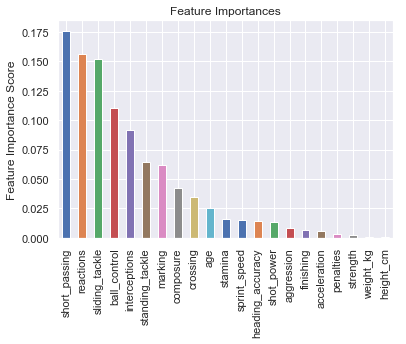

In [99]:
#Tuning with GridSearch
estimators = [x for x in range(700,750,10)]
param_test1 = {'n_estimators':estimators}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch1.fit(dta[features],dta["Value (M)"])

gsearch1.score, gsearch1.best_params_, gsearch1.best_score_
modelfit(gsearch1.best_estimator_, dta, features)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


                            OLS Regression Results                            
Dep. Variable:              Value (M)   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     215.7
Date:                Thu, 06 Dec 2018   Prob (F-statistic):          1.65e-206
Time:                        18:36:57   Log-Likelihood:                -9297.1
No. Observations:                4443   AIC:                         1.861e+04
Df Residuals:                    4437   BIC:                         1.864e+04
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.7616      0.029     59.870

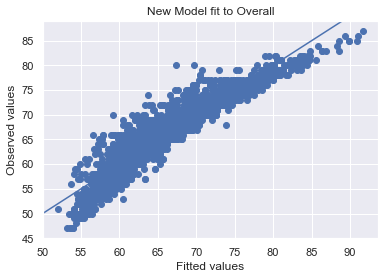

In [100]:
#MODEL CREATION
data=FB
lnVal=pd.DataFrame((data["Value (M)"]+1).apply(np.log))
lnVal.columns = ['ln_value']
fb_dta = pd.concat([lnVal, data], axis=1)
fb_dta.head()
data=fb_dta
#Create our New Model with Interaction Terms
data=fb_dta
def fb_skills_off (row):
    return row['short_passing'] * row['ball_control'] * row['crossing'] 
def fb_skills_def (row):
    return row['sliding_tackle']*row['standing_tackle']*row['marking']
def fb_ath_ment (row):
    return row['sprint_speed'] *row['stamina'] *row['composure'] *row['reactions']*row['interceptions']


def fb_phy (row):
    return row['height_cm'] * row['weight_kg']

data=fb_dta
data['fb_skills_off'] = data.apply(fb_skills_off, axis=1)
data['fb_skills_def'] = data.apply(fb_skills_def, axis=1)
data['fb_ath_ment']= data.apply(fb_ath_ment, axis=1)
data['fb_phy']= data.apply(fb_phy, axis=1)
features=['age', 'fb_skills_off', 'fb_skills_def', 'fb_ath_ment', 'fb_phy']
x=data[features]
#We must now scale the features
x =pd.DataFrame(scaler.fit_transform(x))
x.columns= ['age', 'fb_skills_off', 'fb_skills_def', 'fb_ath_ment','fb_phy']
#We have now addressed the issue of endogenity by including interaction terms
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
mod=sm.OLS(y1,X)
res=mod.fit(cov_type='HC0')
yhat = res.fittedvalues
OLS_model = sm.OLS(y2,X)
OLS_results=OLS_model.fit(cov_type='HC0')
#results of new model on value
print(OLS_results.summary())
print(res.aic)
OLS_model2 = sm.OLS(y3,X)
OLS_results2=OLS_model2.fit(cov_type='HC0')
#results for new model on value elasticity
print(OLS_results2.summary())
#Plot of y-hat for y-true on the reduced model for overall rating
from statsmodels.graphics.api import abline_plot
fig, ax = plt.subplots()
ax.scatter(yhat, y1)
line_fit = sm.OLS(y1, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('New Model fit to Overall')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');


As shown above the created model has eliminated the collinearity and improved the model.

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Positional Value Modeling: Center Mid
</p><br>

# Center Midfielders

In [101]:
data=CM
lnVal=pd.DataFrame((data["Value (M)"]+1).apply(np.log))
lnVal.columns = ['ln_value']
cm_dta = pd.concat([lnVal, data], axis=1)

data=cm_dta
x=data[attribute_profile]
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
#OLS for Overall
OLS_model = sm.OLS(y1,X)
OLS_results=OLS_model.fit(cov_type='HC0')
print("The R-squared for the attributes with overall is:" ,OLS_results.rsquared_adj)
OLS_model2 = sm.OLS(y2,X)
OLS_results2=OLS_model2.fit(cov_type='HC0')
print("\n\nThe adjusted R-squared for the original CB value model is:" ,OLS_results2.rsquared_adj)
print("\nThe model AIC is: " ,OLS_results2.aic)
#Lasso Regression
X_train,X_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

#Lasso Fit (Overall)
lasso = Lasso(alpha=1.0, max_iter=1000000).fit(X_train, y_train)

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
X_std = scaler.fit_transform(x)
regr_cv = LassoCV(alphas=np.arange(1,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y1)
print("The alpha we should use for lasso regression is:" ,model_cv.alpha_)
lasso = Lasso(alpha=1.0, max_iter=1000000).fit(X_train, y_train)
#Lasso Coefficients 
y_prediction = lasso.predict(X_test)
lasso_coef=lasso.coef_
cols=np.array(x.columns)
cols=cols.reshape(37,1)
lasso_coef=lasso_coef.reshape(37,1)
coefs=np.concatenate((cols, lasso_coef), axis=1)
coefs=pd.DataFrame(coefs)
intercept=lasso.intercept_
print("the intercept is:" ,intercept)
print(coefs)

The R-squared for the attributes with overall is: 0.8953641207295303


The adjusted R-squared for the original CB value model is: 0.46045033958288306

The model AIC is:  48960.15443371765


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warni

The alpha we should use for lasso regression is: 1.0
the intercept is: [6.91522968]
                     0           1
0                  age           0
1            height_cm          -0
2            weight_kg           0
3             crossing   0.0204125
4            finishing  0.00998851
5     heading_accuracy   0.0431929
6        short_passing    0.194018
7              volleys          -0
8            dribbling  0.00547681
9                curve           0
10  free_kick_accuracy           0
11        long_passing           0
12        ball_control    0.203133
13        acceleration   0.0261684
14        sprint_speed   0.0111252
15             agility           0
16           reactions    0.200533
17             balance          -0
18          shot_power           0
19             jumping           0
20             stamina   0.0376082
21            strength   0.0314665
22          long_shots   0.0207321
23          aggression  0.00614993
24       interceptions   0.0108572
25    

<Figure size 936x936 with 0 Axes>

Text(0.5, 1.05, 'Pearson correlation of used Features with Targets')

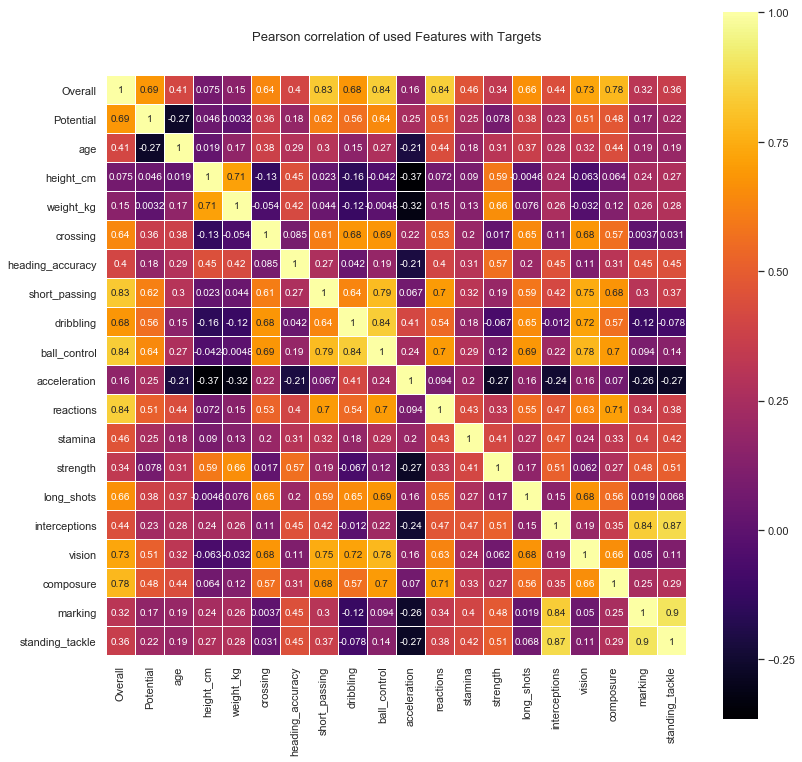

In [102]:
used_variables =['Overall','Potential','age', 'height_cm', 'weight_kg', 'crossing', 'heading_accuracy',
       'short_passing', 'dribbling', 
        'ball_control', 'acceleration',
        'reactions',  'stamina',
       'strength', 'long_shots',  'interceptions',
       'vision',  'composure', 'marking', 'standing_tackle']
corr_variables = data[used_variables]
colormap = plt.cm.inferno
plt.figure(figsize=(13,13))
plt.title('Pearson correlation of used Features with Targets', 
          y=1.05, size=13)
sns.heatmap(corr_variables.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [103]:
features=lasso.coef_
indices=np.nonzero(features)
np.take(features, indices)
cm_features_used=['age', 'height_cm', 'weight_kg', 'crossing', 'heading_accuracy',
       'short_passing', 'dribbling', 
        'ball_control', 'acceleration',
        'reactions',  'stamina',
       'strength', 'long_shots',  'interceptions',
       'vision',  'composure', 'marking', 'standing_tackle']
#Finding the best alpha for ridge regression for value
x=data[cm_features_used]
y2=data[value_target]

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
scaler = StandardScaler()
X_std = scaler.fit_transform(x)
regr_cv = RidgeCV(alphas=np.arange(0.001,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y2)
model_cv.alpha_
print("The alpha we should use for ridge regression is:" ,model_cv.alpha_)
x.shape
#Fitting ridge regression to the reduced model
#Note we use the suggested alpha of 55.01
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
#Ridge fit: Finding out what alpha to use for ridge
ridge = Ridge(alpha=55.01)
ridge.fit(X_train, y_train)
y_prediction = ridge.predict(X_test)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
cols=cols.reshape(18,1)
ridge_coef=ridge_coef.reshape(18,1)
ridge_coefs=np.concatenate((cols, ridge_coef), axis=1)
ridge_coefs=pd.DataFrame(ridge_coefs)
ridge_intercept=ridge.intercept_
print(ridge_intercept)
print(ridge_coefs)

array([[0.02041246, 0.00998851, 0.04319294, 0.19401826, 0.00547681,
        0.20313274, 0.0261684 , 0.01112518, 0.20053299, 0.03760819,
        0.03146648, 0.0207321 , 0.00614993, 0.01085724, 0.00419401,
        0.00809233, 0.09153333, 0.00131498, 0.00335376]])

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


55.00099999999999

The alpha we should use for ridge regression is: 55.00099999999999


(8471, 18)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Ridge(alpha=55.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

[-29.44659204]
                   0           1
0                age   -0.315486
1          height_cm  -0.0191657
2          weight_kg   0.0294251
3           crossing  0.00663918
4   heading_accuracy   0.0253147
5      short_passing    0.210048
6          dribbling   0.0276017
7       ball_control   0.0747416
8       acceleration   0.0244876
9          reactions    0.188915
10           stamina    0.013117
11          strength   0.0143285
12        long_shots  -0.0167068
13     interceptions  0.00766452
14            vision  0.00727878
15         composure   0.0688174
16           marking  -0.0525116
17   standing_tackle    0.025667


In [104]:
#Model Evaluation for Value
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
Ridge_train_score = ridge.score(X_train,y_train)
Ridge_test_score = ridge.score(X_test, y_test)
y_prediction = ridge.predict(X_test)
print("The training and test scores respectively are: " ,Ridge_train_score, "and" ,Ridge_test_score)
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))
print("\n Root Mean Square Error of test set is:" ,RMSE_test)
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ridge,X,y2,cv=5)
print("\n K-folds cross validation scores:" ,scores)

The training and test scores respectively are:  0.45178550541072693 and 0.4611055075784981

 Root Mean Square Error of test set is: 4.372830190504617

 K-folds cross validation scores: [  0.42382554 -81.09512036   0.44096329   0.45005531  -8.69297798]



Model Report
RMSE : 1.03
CV Score : Mean - 1.111 | Std - 0.8587 | Min - 0.2661 | Max - 2.905


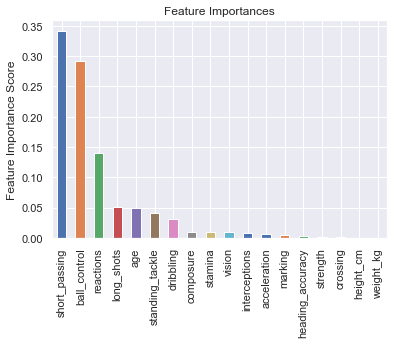

In [105]:
#Gradient Boosting Regression


cm_reduced=['Value (M)','age', 'height_cm', 'weight_kg', 'crossing', 'heading_accuracy',
       'short_passing', 'dribbling', 
        'ball_control', 'acceleration',
        'reactions',  'stamina',
       'strength', 'long_shots',  'interceptions',
       'vision',  'composure', 'marking', 'standing_tackle']
dta=data[cm_reduced]

def modelfit(alg, dtrain, features, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
    
    alg.fit(dtrain[features],dtrain["Value (M)"] )
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[features])

    #Perform cross-validation:
    cv_score =  cross_val_score(alg, dtrain[features], dtrain["Value (M)"], cv=cv_folds,
                                                scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain["Value (M)"], dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),
                                                                             np.std(cv_score),np.min(cv_score),
                                                                              np.max(cv_score)))
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, features).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        


features = [i for i in dta.columns if i != "Value (M)"]
target = "Value (M)"
gbm0 = GradientBoostingRegressor(random_state=7)
modelfit(gbm0, dta, features)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': [700, 710, 720, 730, 740]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

(<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise-deprecating',
        estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
        fit_params=None, iid=False, n_jobs=4,
        param_grid={'n_estimators': [700, 710, 720, 730, 740]},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring='neg_mean_squared_error', verbose=0)>,
 {'n_estimators': 740},
 -2.372786498292478)


Model Report
RMSE : 0.889
CV Score : Mean - 1.118 | Std - 1.06 | Min - 0.1824 | Max - 3.193


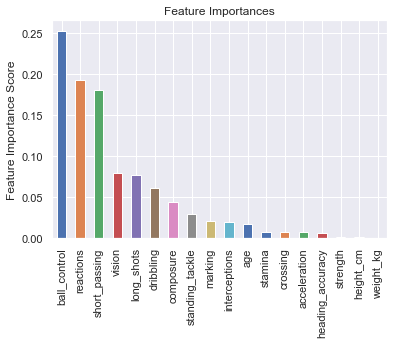

In [106]:
#Tuning with GridSearch
estimators = [x for x in range(700,750,10)]
param_test1 = {'n_estimators':estimators}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch1.fit(dta[features],dta["Value (M)"])

gsearch1.score, gsearch1.best_params_, gsearch1.best_score_
modelfit(gsearch1.best_estimator_, dta, features)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


                            OLS Regression Results                            
Dep. Variable:              Value (M)   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     337.8
Date:                Thu, 06 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:47:16   Log-Likelihood:                -23419.
No. Observations:                8471   AIC:                         4.685e+04
Df Residuals:                    8465   BIC:                         4.689e+04
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.9211      0.042     70.004

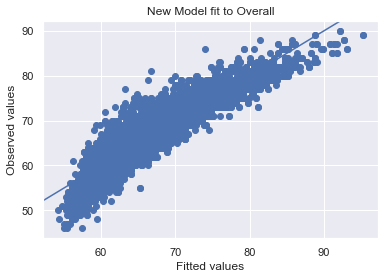

In [107]:
#MODEL CREATION

#Create our New Model with Interaction Terms
data=CM
lnVal=pd.DataFrame((data["Value (M)"]+1).apply(np.log))
lnVal.columns = ['ln_value']
cm_dta = pd.concat([lnVal, data], axis=1)
cm_dta.head()
data=cm_dta
def cm_skills_off (row):
    return row['short_passing'] * row['ball_control'] * row['long_shots'] *row['dribbling'] 
def cm_skills_def (row):
    return row['standing_tackle']*row['marking']
def cm_ath_ment (row):
    return row['stamina'] * row['acceleration'] *row['composure'] *row['reactions'] * row['interceptions'] *row['vision']



def cm_phy (row):
    return row['height_cm'] * row['weight_kg']


data['cm_skills_off'] = data.apply(cm_skills_off, axis=1)
data['cm_skills_def'] = data.apply(cm_skills_def, axis=1)
data['cm_ath_ment']= data.apply(cm_ath_ment, axis=1)
data['cm_phy']= data.apply(cm_phy, axis=1)

features=['age', 'cm_skills_off', 'cm_skills_def', 'cm_ath_ment', 'cm_phy']
x=data[features]
#We must now scale the features
x =pd.DataFrame(scaler.fit_transform(x))
x.columns= ['age', 'cm_skills_off', 'cm_skills_def', 'cm_ath_ment', 'cm_phy']
#We have now addressed the issue of endogenity by including interaction terms
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
mod=sm.OLS(y1,X)
res=mod.fit(cov_type='HC0')
yhat = res.fittedvalues
OLS_model = sm.OLS(y2,X)
OLS_results=OLS_model.fit(cov_type='HC0')
#results of new model on value
print(OLS_results.summary())
OLS_model2 = sm.OLS(y3,X)
OLS_results2=OLS_model2.fit(cov_type='HC0')
#results for new model on value elasticity
print(OLS_results2.summary())
print(res.aic)
#Plot of y-hat for y-true on the reduced model for overall rating
from statsmodels.graphics.api import abline_plot
fig, ax = plt.subplots()
ax.scatter(yhat, y1)
line_fit = sm.OLS(y1, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('New Model fit to Overall')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

As shown above the created model improved the score and solved the collinearity problem.

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Positional Value Modeling: Wingers
</p><br>

# Wingers

In [108]:
data=W
lnVal=pd.DataFrame((data["Value (M)"]+1).apply(np.log))
lnVal.columns = ['ln_value']
W_dta = pd.concat([lnVal, data], axis=1)

data=W_dta
x=data[attribute_profile]
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
#OLS for Overall
OLS_model = sm.OLS(y1,X)
OLS_results=OLS_model.fit(cov_type='HC0')
print("The R-squared for the attributes with overall is:" ,OLS_results.rsquared_adj)
OLS_model2 = sm.OLS(y2,X)
OLS_results2=OLS_model2.fit(cov_type='HC0')
print("\n\nThe adjusted R-squared for the original CB value model is:" ,OLS_results2.rsquared_adj)
print("\nThe model AIC is: " ,OLS_results2.aic)
#Lasso Regression
X_train,X_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

#Lasso Fit (Overall)
lasso = Lasso(alpha=1.0, max_iter=1000000).fit(X_train, y_train)

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
X_std = scaler.fit_transform(x)
regr_cv = LassoCV(alphas=np.arange(1,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y1)
print("The alpha we should use for lasso regression is:" ,model_cv.alpha_)
lasso = Lasso(alpha=1.0, max_iter=1000000).fit(X_train, y_train)
#Lasso Coefficients 
y_prediction = lasso.predict(X_test)
lasso_coef=lasso.coef_
cols=np.array(x.columns)
cols=cols.reshape(37,1)
lasso_coef=lasso_coef.reshape(37,1)
coefs=np.concatenate((cols, lasso_coef), axis=1)
coefs=pd.DataFrame(coefs)
intercept=lasso.intercept_
print("the intercept is:" ,intercept)
print(coefs)

The R-squared for the attributes with overall is: 0.9482678210525392


The adjusted R-squared for the original CB value model is: 0.4663801039643096

The model AIC is:  39714.73444436689


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warni

The alpha we should use for lasso regression is: 1.0
the intercept is: [5.93441979]
                     0            1
0                  age            0
1            height_cm            0
2            weight_kg            0
3             crossing    0.0800667
4            finishing    0.0207548
5     heading_accuracy    0.0299778
6        short_passing     0.127622
7              volleys            0
8            dribbling     0.113739
9                curve            0
10  free_kick_accuracy            0
11        long_passing   0.00250001
12        ball_control     0.175502
13        acceleration    0.0511156
14        sprint_speed    0.0377649
15             agility            0
16           reactions     0.125395
17             balance            0
18          shot_power            0
19             jumping   0.00194869
20             stamina    0.0354372
21            strength   0.00806433
22          long_shots    0.0121247
23          aggression   0.00117876
24       interce

<Figure size 936x936 with 0 Axes>

Text(0.5, 1.05, 'Pearson correlation of used Features with Targets')

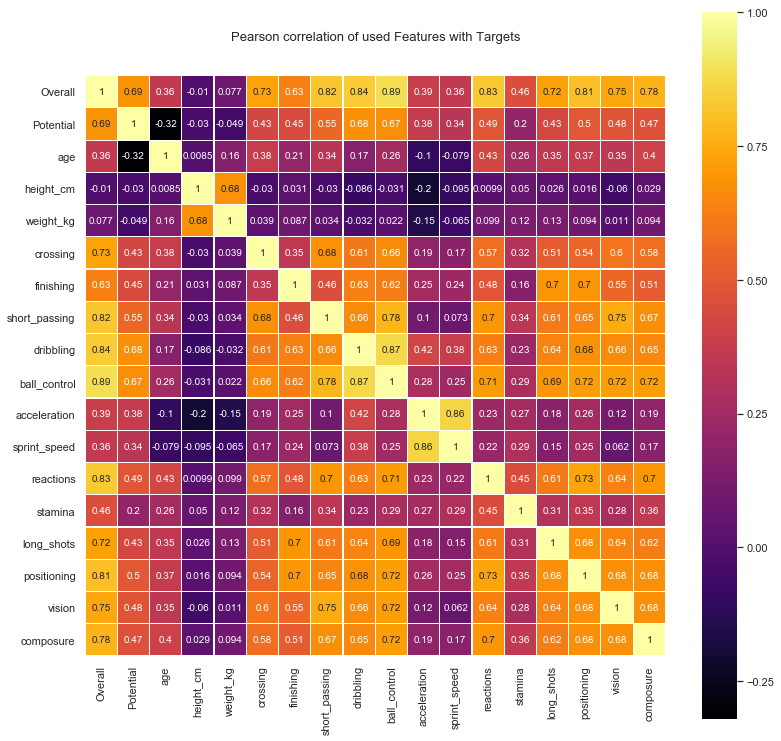

In [109]:
used_variables = ['Overall','Potential','age', 'height_cm', 'weight_kg', 'crossing', 'finishing',
       'short_passing', 'dribbling', 'ball_control', 'acceleration', 'sprint_speed',
       'reactions',  'stamina',
       'long_shots', 'positioning',
       'vision',  'composure']
corr_variables = data[used_variables]
colormap = plt.cm.inferno
plt.figure(figsize=(13,13))
plt.title('Pearson correlation of used Features with Targets', 
          y=1.05, size=13)
sns.heatmap(corr_variables.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [110]:
features=lasso.coef_
indices=np.nonzero(features)
np.take(features, indices)
w_features_used=['age', 'height_cm', 'weight_kg', 'crossing', 'finishing',
       'short_passing', 'dribbling', 'ball_control', 'acceleration', 'sprint_speed',
       'reactions',  'stamina',
       'long_shots', 'positioning',
       'vision',  'composure']
#Finding the best alpha for ridge regression for value
x=data[w_features_used]
y2=data[value_target]

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
scaler = StandardScaler()
X_std = scaler.fit_transform(x)
regr_cv = RidgeCV(alphas=np.arange(0.001,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y2)
model_cv.alpha_
print("The alpha we should use for ridge regression is:" ,model_cv.alpha_)
x.shape
#Fitting ridge regression to the reduced model
#Note we use the suggested alpha of 79.01
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
#Ridge fit: Finding out what alpha to use for ridge
ridge = Ridge(alpha=79.01)
ridge.fit(X_train, y_train)
y_prediction = ridge.predict(X_test)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
cols=cols.reshape(16,1)
ridge_coef=ridge_coef.reshape(16,1)
ridge_coefs=np.concatenate((cols, ridge_coef), axis=1)
ridge_coefs=pd.DataFrame(ridge_coefs)
ridge_intercept=ridge.intercept_
print(ridge_intercept)
print(ridge_coefs)

array([[8.00666953e-02, 2.07547591e-02, 2.99778029e-02, 1.27622375e-01,
        1.13738671e-01, 2.50001130e-03, 1.75502420e-01, 5.11155599e-02,
        3.77649071e-02, 1.25394551e-01, 1.94868733e-03, 3.54371854e-02,
        8.06433388e-03, 1.21246975e-02, 1.17875974e-03, 2.55774399e-03,
        5.83953203e-02, 1.51737182e-02, 6.29393383e-03, 3.16954496e-02,
        8.01610996e-05, 7.33574595e-04]])

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


79.00099999999999

The alpha we should use for ridge regression is: 79.00099999999999


(6685, 16)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Ridge(alpha=79.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

[-37.96628836]
                0          1
0             age  -0.338955
1       height_cm  0.0354684
2       weight_kg -0.0150212
3        crossing  0.0405286
4       finishing  0.0567221
5   short_passing  0.0972522
6       dribbling  0.0548051
7    ball_control    0.12961
8    acceleration  0.0501735
9    sprint_speed -0.0163293
10      reactions   0.141411
11        stamina  0.0124369
12     long_shots -0.0305993
13    positioning  0.0484458
14         vision  0.0315826
15      composure   0.065729


In [111]:
#Model Evaluation for Value
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
Ridge_train_score = ridge.score(X_train,y_train)
Ridge_test_score = ridge.score(X_test, y_test)
y_prediction = ridge.predict(X_test)
print("The training and test scores respectively are: " ,Ridge_train_score, "and" ,Ridge_test_score)
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))
print("\n Root Mean Square Error of test set is:" ,RMSE_test)
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ridge,X,y2,cv=5)
print("\n K-folds cross validation scores:" ,scores)

The training and test scores respectively are:  0.44352486274701625 and 0.5149970405114312

 Root Mean Square Error of test set is: 4.00026697162954

 K-folds cross validation scores: [  0.43742721  -8.6296417    0.50575815 -11.95888424   0.35889686]



Model Report
RMSE : 0.9378
CV Score : Mean - 1.408 | Std - 0.8006 | Min - 0.3983 | Max - 2.681


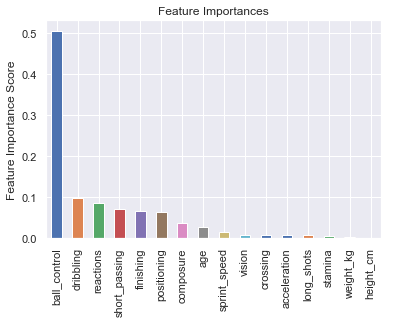

In [112]:
#GBT
#Gradient Boosting Regression


w_reduced=['Value (M)', 'age', 'height_cm', 'weight_kg', 'crossing', 'finishing',
       'short_passing', 'dribbling', 'ball_control', 'acceleration', 'sprint_speed',
       'reactions',  'stamina',
       'long_shots', 'positioning',
       'vision',  'composure']
dta=data[w_reduced]
def modelfit(alg, dtrain, features, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
    
    alg.fit(dtrain[features],dtrain["Value (M)"] )
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[features])

    #Perform cross-validation:
    cv_score =  cross_val_score(alg, dtrain[features], dtrain["Value (M)"], cv=cv_folds,
                                                scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain["Value (M)"], dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),
                                                                             np.std(cv_score),np.min(cv_score),
                                                                              np.max(cv_score)))
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, features).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        


features = [i for i in dta.columns if i != "Value (M)"]
target = "Value (M)"
gbm0 = GradientBoostingRegressor(random_state=7)
modelfit(gbm0, dta, features)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': [700, 710, 720, 730, 740]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

(<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise-deprecating',
        estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
        fit_params=None, iid=False, n_jobs=4,
        param_grid={'n_estimators': [700, 710, 720, 730, 740]},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring='neg_mean_squared_error', verbose=0)>,
 {'n_estimators': 740},
 -3.4767927712485758)


Model Report
RMSE : 1.151
CV Score : Mean - 1.456 | Std - 1.165 | Min - 0.2721 | Max - 3.746


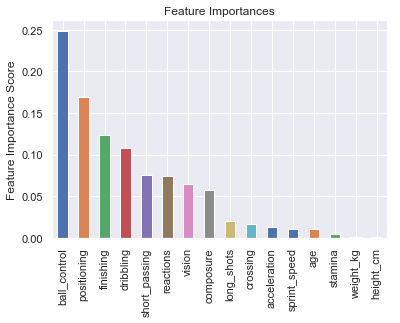

In [113]:
estimators = [x for x in range(700,750,10)]
param_test1 = {'n_estimators':estimators}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch1.fit(dta[features],dta["Value (M)"])

gsearch1.score, gsearch1.best_params_, gsearch1.best_score_
modelfit(gsearch1.best_estimator_, dta, features)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


                            OLS Regression Results                            
Dep. Variable:              Value (M)   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     240.9
Date:                Thu, 06 Dec 2018   Prob (F-statistic):          3.06e-237
Time:                        20:44:24   Log-Likelihood:                -18863.
No. Observations:                6685   AIC:                         3.774e+04
Df Residuals:                    6679   BIC:                         3.778e+04
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.1022      0.050     62.372   

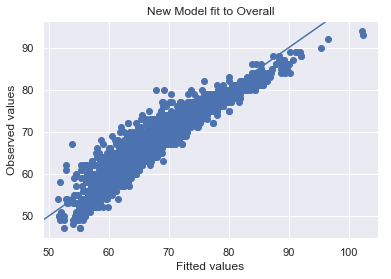

In [114]:
#MODEL CREATION

#Create our New Model with Interaction Terms

def w_skills (row):
    return row['short_passing'] * row['ball_control']  *row['dribbling'] 
def w_skills_off (row):
    return row['positioning']*row['finishing']
def w_ath_ment (row):
    return row['stamina'] * row['acceleration'] *row['sprint_speed']*row['composure'] *row['reactions'] * row['vision']

#def w_mentality (row):
    #return row['composure'] *row['reactions'] * row['vision']

def w_phy (row):
    return row['height_cm'] * row['weight_kg']


data['w_skills'] = data.apply(w_skills, axis=1)
data['w_skills_off'] = data.apply(w_skills_off, axis=1)
data['w_ath_ment']= data.apply(w_ath_ment, axis=1)
#data['w_mentality']= data.apply(w_ath, axis=1)
data['w_phy']= data.apply(w_phy, axis=1)
features=['age', 'w_skills', 'w_skills_off', 'w_ath_ment',  'w_phy']
x=data[features]
#We must now scale the features
x =pd.DataFrame(scaler.fit_transform(x))
x.columns=['age', 'w_skills', 'w_skills_off', 'w_ath_ment', 'w_phy']
#We have now addressed the issue of endogenity by including interaction terms
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
mod=sm.OLS(y1,X)
res=mod.fit(cov_type='HC0')
yhat = res.fittedvalues
OLS_model = sm.OLS(y2,X)
OLS_results=OLS_model.fit(cov_type='HC0')
#results of new model on value
print(OLS_results.summary())
OLS_model2 = sm.OLS(y3,X)
OLS_results2=OLS_model2.fit(cov_type='HC0')
#results for new model on value elasticity
print(OLS_results2.summary())
print(res.aic)
#Plot of y-hat for y-true on the reduced model for overall rating
from statsmodels.graphics.api import abline_plot
fig, ax = plt.subplots()
ax.scatter(yhat, y1)
line_fit = sm.OLS(y1, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('New Model fit to Overall')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

As shown above the created model improved the score and solved the collinearity problem.

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Positional Value Modeling: Forwards
</p><br>

# Forwards

In [115]:
data=F
lnVal=pd.DataFrame((data["Value (M)"]+1).apply(np.log))
lnVal.columns = ['ln_value']
f_dta = pd.concat([lnVal, data], axis=1)

data=f_dta
x=data[attribute_profile]
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]
#OLS for Overall
OLS_model = sm.OLS(y1,X)
OLS_results=OLS_model.fit(cov_type='HC0')
print("The R-squared for the attributes with overall is:" ,OLS_results.rsquared_adj)
OLS_model2 = sm.OLS(y2,X)
OLS_results2=OLS_model2.fit(cov_type='HC0')
print("\n\nThe adjusted R-squared for the original CB value model is:" ,OLS_results2.rsquared_adj)
print("\nThe model AIC is: " ,OLS_results2.aic)
#Lasso Regression
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

#Lasso Fit (Overall)
lasso = Lasso(alpha=1.0, max_iter=1000000).fit(X_train, y_train)


from sklearn.linear_model import LassoCV

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std=scaler.fit_transform(X)
regr_cv = LassoCV(alphas=np.arange(1,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y1)
print("The alpha we should use for lasso regression is:" ,model_cv.alpha_)
lasso = Lasso(alpha=1.0, max_iter=1000000).fit(X_train, y_train)
#Lasso Coefficients 
y_prediction = lasso.predict(X_test)
lasso_coef=lasso.coef_
cols=np.array(x.columns)
cols=cols.reshape(37,1)
lasso_coef=lasso_coef.reshape(37,1)
coefs=np.concatenate((cols, lasso_coef), axis=1)
coefs=pd.DataFrame(coefs)
intercept=lasso.intercept_
print("the intercept is:" ,intercept)
print(coefs)

The R-squared for the attributes with overall is: 0.9688747358983668


The adjusted R-squared for the original CB value model is: 0.4357079026258578

The model AIC is:  21638.390672754944


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in ver

The alpha we should use for lasso regression is: 1.0
the intercept is: [5.85079122]
                     0            1
0                  age            0
1            height_cm            0
2            weight_kg            0
3             crossing   0.00477795
4            finishing     0.113041
5     heading_accuracy    0.0426845
6        short_passing    0.0806355
7              volleys   0.00835998
8            dribbling     0.058005
9                curve   0.00328322
10  free_kick_accuracy   0.00273747
11        long_passing  0.000808266
12        ball_control     0.154566
13        acceleration    0.0246743
14        sprint_speed    0.0358264
15             agility            0
16           reactions    0.0884776
17             balance           -0
18          shot_power    0.0846525
19             jumping            0
20             stamina   0.00624438
21            strength    0.0321246
22          long_shots    0.0197307
23          aggression   0.00271808
24       interce

<Figure size 1008x1008 with 0 Axes>

Text(0.5, 1.05, 'Pearson correlation of used Features with Targets')

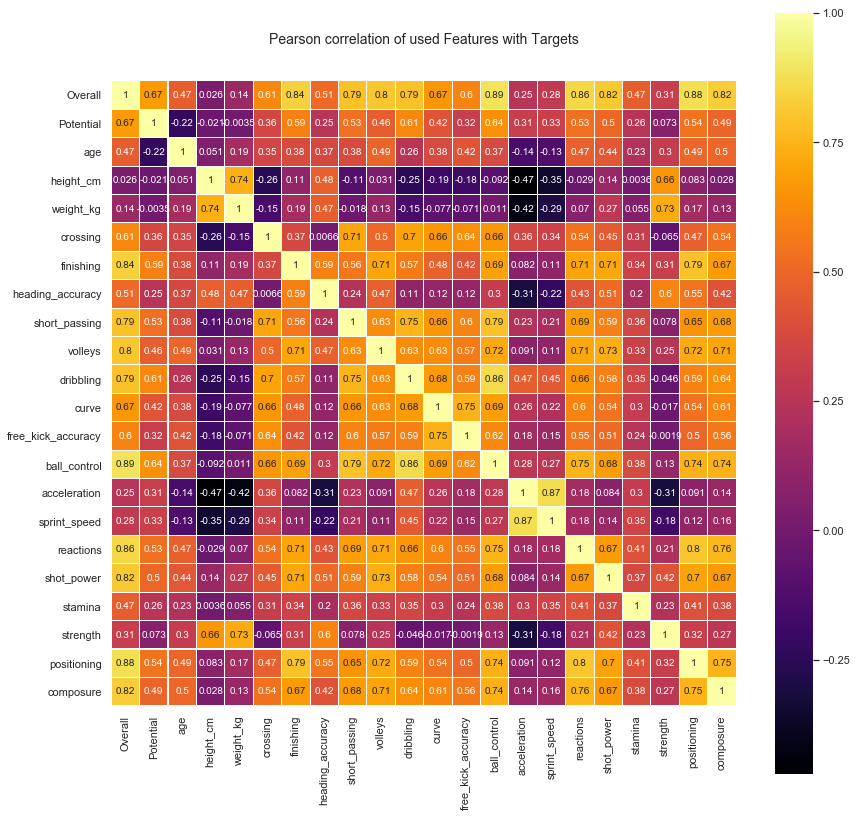

In [116]:
used_variables = ['Overall','Potential','age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
        'ball_control', 'acceleration', 'sprint_speed','reactions',  'shot_power',  'stamina',
       'strength',  'positioning','composure']
corr_variables = data[used_variables]
colormap = plt.cm.inferno
plt.figure(figsize=(14,14))
plt.title('Pearson correlation of used Features with Targets', 
          y=1.05, size=14)
sns.heatmap(corr_variables.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [117]:
features=lasso.coef_
indices=np.nonzero(features)
np.take(features, indices)
f_features_used=['age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
        'ball_control', 'acceleration', 'sprint_speed','reactions',  'shot_power',  'stamina',
       'strength',  'positioning','composure']
#Finding the best alpha for ridge regression for value
x=data[f_features_used]
y2=data[value_target]

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
scaler = StandardScaler()
X_std = scaler.fit_transform(x)
regr_cv = RidgeCV(alphas=np.arange(0.001,9999.999))
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y2)
model_cv.alpha_
print("The alpha we should use for ridge regression is:" ,model_cv.alpha_)
x.shape
#Fitting ridge regression to the reduced model
#Note we use the suggested alpha of 70.01
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
#Ridge fit: Finding out what alpha to use for ridge
ridge = Ridge(alpha=70.01)
ridge.fit(X_train, y_train)
y_prediction = ridge.predict(X_test)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
ridge_coef=ridge.coef_
cols=np.array(x.columns)
cols=cols.reshape(20,1)
ridge_coef=ridge_coef.reshape(20,1)
ridge_coefs=np.concatenate((cols, ridge_coef), axis=1)
ridge_coefs=pd.DataFrame(ridge_coefs)
ridge_intercept=ridge.intercept_
print(ridge_intercept)
print(ridge_coefs)

array([[0.00477795, 0.11304053, 0.0426845 , 0.0806355 , 0.00835998,
        0.05800503, 0.00328322, 0.00273747, 0.00080827, 0.15456563,
        0.02467427, 0.03582643, 0.08847755, 0.08465247, 0.00624438,
        0.03212463, 0.01973069, 0.00271808, 0.13209683, 0.04374019]])

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


70.00099999999999

The alpha we should use for ridge regression is: 70.00099999999999


(3518, 20)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Ridge(alpha=70.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

[-31.65342991]
                     0            1
0                  age    -0.385521
1            height_cm  -0.00154746
2            weight_kg    0.0106391
3             crossing  -0.00520718
4            finishing     0.224509
5     heading_accuracy  -0.00814832
6        short_passing    0.0660498
7              volleys   0.00332663
8            dribbling  0.000975116
9                curve    0.0178649
10  free_kick_accuracy    0.0191103
11        ball_control    0.0787713
12        acceleration    0.0109136
13        sprint_speed    0.0159083
14           reactions     0.152425
15          shot_power    -0.043562
16             stamina    0.0180914
17            strength    0.0180124
18         positioning    0.0455791
19           composure    0.0708274


In [118]:
#Model Evaluation for Value
X_train,X_test,y_train,y_test=train_test_split(x,y2,test_size=0.3,random_state=0)
Ridge_train_score = ridge.score(X_train,y_train)
Ridge_test_score = ridge.score(X_test, y_test)
y_prediction = ridge.predict(X_test)
print("The training and test scores respectively are: " ,Ridge_train_score, "and" ,Ridge_test_score)
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))
print("\n Root Mean Square Error of test set is:" ,RMSE_test)
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ridge,X,y2,cv=5)
print("\n K-folds cross validation scores:" ,scores)

The training and test scores respectively are:  0.44459314787396115 and 0.4051721153012315

 Root Mean Square Error of test set is: 5.640307227386972

 K-folds cross validation scores: [-3.26845515e-02 -1.81054077e+01 -9.75911635e+01 -3.14055837e+02
 -1.22471176e-01]



Model Report
RMSE : 0.8192
CV Score : Mean - 1.575 | Std - 2.469 | Min - 0.1849 | Max - 8.807


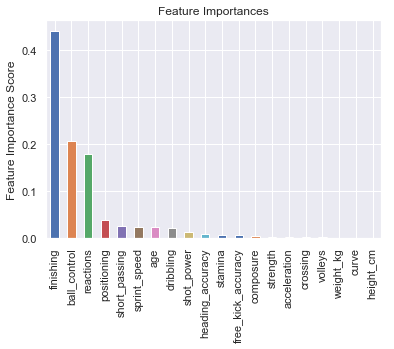

In [119]:
#GBT
#Gradient Boosting Regression


f_reduced=['Value (M)','age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
        'ball_control', 'acceleration', 'sprint_speed','reactions',  'shot_power',  'stamina',
       'strength',  'positioning','composure']
dta=data[f_reduced]
def modelfit(alg, dtrain, features, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
    
    alg.fit(dtrain[features],dtrain["Value (M)"] )
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[features])

    #Perform cross-validation:
    cv_score =  cross_val_score(alg, dtrain[features], dtrain["Value (M)"], cv=cv_folds,
                                                scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain["Value (M)"], dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),
                                                                             np.std(cv_score),np.min(cv_score),
                                                                              np.max(cv_score)))
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, features).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        

features = [i for i in dta.columns if i != "Value (M)"]
target = "Value (M)"
gbm0 = GradientBoostingRegressor(random_state=7)
modelfit(gbm0, dta, features)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': [700, 710, 720, 730, 740]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

(<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise-deprecating',
        estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
        fit_params=None, iid=False, n_jobs=4,
        param_grid={'n_estimators': [700, 710, 720, 730, 740]},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring='neg_mean_squared_error', verbose=0)>,
 {'n_estimators': 730},
 -12.245103361932717)


Model Report
RMSE : 1.312
CV Score : Mean - 1.81 | Std - 2.995 | Min - 0.1426 | Max - 10.45


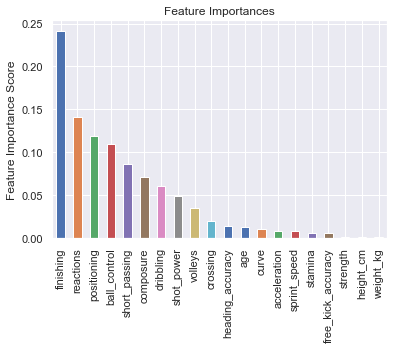

In [120]:
estimators = [x for x in range(700,750,10)]
param_test1 = {'n_estimators':estimators}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch1.fit(dta[features],dta["Value (M)"])

gsearch1.score, gsearch1.best_params_, gsearch1.best_score_
modelfit(gsearch1.best_estimator_, dta, features)

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


                            OLS Regression Results                            
Dep. Variable:              Value (M)   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     125.3
Date:                Thu, 06 Dec 2018   Prob (F-statistic):          2.21e-122
Time:                        20:55:49   Log-Likelihood:                -10290.
No. Observations:                3518   AIC:                         2.059e+04
Df Residuals:                    3512   BIC:                         2.063e+04
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.9884      0.076     39.309   

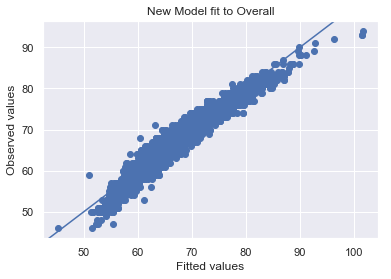

In [121]:
#MODEL CREATION

#Create our New Model with Interaction Terms

def f_skills (row):
    return row['short_passing'] * row['crossing'] *row['dribbling'] *row['ball_control']*row['free_kick_accuracy']
def f_skills_off (row):
    return row['positioning']*row['finishing']*row['volleys']*row['heading_accuracy']*row['curve']*row['shot_power']
def f_ath_ment (row):
    return row['acceleration'] *row['sprint_speed']*row['strength'] *row['composure'] *row['reactions'] * row['stamina']

def f_phy (row):
    return row['height_cm'] * row['weight_kg']


data['f_skills'] = data.apply(w_skills, axis=1)
data['f_skills_off'] = data.apply(w_skills_off, axis=1)
data['f_ath_ment']= data.apply(w_ath_ment, axis=1)
data['f_phy']= data.apply(w_phy, axis=1)
features=['age', 'f_skills', 'f_skills_off', 'f_ath_ment',  'f_phy']
x=data[features]
#We must now scale the features
x =pd.DataFrame(scaler.fit_transform(x))
x.columns=['age', 'f_skills', 'f_skills_off', 'f_ath_ment', 'f_phy']
#We have now addressed the issue of endogenity by including interaction terms
X=sm.add_constant(x)
y1=data[overall_target]
y2=data[value_target]
y3=data[ln_value]

mod=sm.OLS(y1,X)
res=mod.fit(cov_type='HC0')
yhat = res.fittedvalues
OLS_model = sm.OLS(y2,X)
OLS_results=OLS_model.fit(cov_type='HC0')
#results of new model on value
print(OLS_results.summary())
OLS_model2 = sm.OLS(y3,X)
OLS_results2=OLS_model2.fit(cov_type='HC0')
#results for new model on value elasticity
print(OLS_results2.summary())
print(res.aic)
#Plot of y-hat for y-true on the reduced model for overall rating
from statsmodels.graphics.api import abline_plot
fig, ax = plt.subplots()
ax.scatter(yhat, y1)
line_fit = sm.OLS(y1, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('New Model fit to Overall')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

As shown above the created model improved the score and solved the collinearity problem.

# Classifying Overall Rating and Position

Description of Model: <br>Classification methods are a form of Supervised Machine Learning where by training the program  using existing training data, the computer classifies the testing data according to the stipulations that define it. 

In [3]:
#Features Lists
descriptive=['club','age', 'league', 'height_cm', 'weight_kg']

overall_target = ['Overall']
potential_target=['Potential']
value_target=['Value (M)']
ln_value=['ln_value']
eur_value=['eur_value']
club=['club_id']
basic_attr=['Overall', 'Potential','age', 'pac', 'sho', 'pas','dri', 'defend', 'phy' , 'reactions',
             'international_reputation', 'skill_moves',
       'weak_foot', 'att_rate_High','att_rate_Low', 'att_rate_High',
            'defend_rate_High','defend_rate_Low']
attribute_profile=['Potential','league_id','age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes']
all_attr=['Overall','Potential', 'Value (M)', 
         'league_id','age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes']
targets=['Overall','Potential', 'Value (M)', 'ln_value', 'eur_value']
data=pd.read_csv("Full_DF.csv")

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Classifying Player Position with k-NN Classification
</p><br>

Description of Method: <br> K Nearest Neighbors is a simple classification method that uses the distance between different cases represented in a dataset to classify data based on their commonalities. There are three distance measures that are generally used with KNN: Euclidean, Manhattan, and Minkowski. 

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

Text(0.5, 12.5, 'predicted value')

Text(89.18, 0.5, 'true value')

0.5028184892897407


/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_val

[0.4635314  0.50676056 0.48830657 0.49083733 0.52230378]


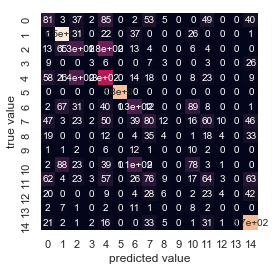

In [132]:
#Model Creation
y=data[['Position']].copy()
X=data[attribute_profile].copy()

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns 
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');
#algorithm score
print(classifier.score(X_test, y_test))
from sklearn import metrics
from sklearn.model_selection import cross_val_score
CVscores=cross_val_score(classifier, X, y, cv=5)
print(CVscores)

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Classifying Overall Rating: Random Forrest 
</p><br>

Description of Method: <br> Random Trees are a form of implementing many Decision Trees. Running many Decision Trees together allows us to increases the accuracy of the classification. 

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,6,6,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,5,8,9,6,0,0,...,0,0,0,0,0,0,0,0,0,0


Accuracy: 0.43987222848553176
Root Mean Square Error of test set is: 1.478074760667067


/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528:

[0.42173061 0.41880101 0.43843336 0.45122986 0.43893454]


Text(0.5, 0, 'Predicted Overall')

Text(0, 0.5, 'True Overall')

Text(0.5, 1.0, 'Predicted vs True')

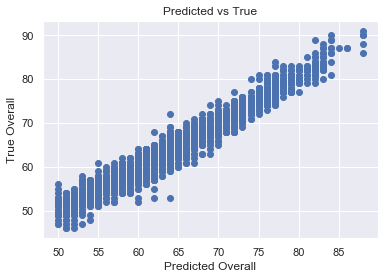

In [133]:
#Model Creation
y=data[['Overall']].copy()
X=data[attribute_profile].copy()
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini')
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predictions))
cm.head()
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=predictions))
print("Root Mean Square Error of test set is:" ,RMSE_test)
from sklearn import metrics
from sklearn.model_selection import cross_val_score
CVscores=cross_val_score(classifier, X, y, cv=5)
print(CVscores)
fig,ax=plt.subplots()
predicted=predictions
true=y_test
ax.scatter(predicted,true)
plt.xlabel('Predicted Overall')
plt.ylabel('True Overall')
plt.title('Predicted vs True')
plt.grid(True)

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Classifying Overall Rating: Bayesian Classification
</p><br>

Description of Method: <br> Bayesian Classification is a classification algorithm used to group tuples by commonality. It is naive because it assumes that each predictor are independent of each other. 

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy: 0.11724915445321307
Root Mean Square Error of test set is: 5.25817843325294


Text(0.5, 0, 'Predicted Overall')

Text(0, 0.5, 'True Overall')

Text(0.5, 1.0, 'Predicted vs True')

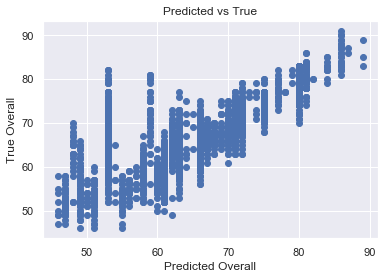

In [125]:
#Model Creation
y=data[['Overall']].copy()
X=data[attribute_profile].copy()
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.naive_bayes import GaussianNB
classifier= GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predictions))
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))
print("Root Mean Square Error of test set is:" ,RMSE_test)

fig,ax=plt.subplots()
predicted=y_pred
true=y_test
ax.scatter(predicted,true)
plt.xlabel('Predicted Overall')
plt.ylabel('True Overall')
plt.title('Predicted vs True')
plt.grid(True)

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Classifying Overall Rating: Support Vector Machine
</p><br>

Description of Method: <br> Support Vector Machine is a supervised machine learning algorithm, and is a discriminative classifier that uses a hyperplane to seperate data on either side of the plane. This method is very useful for analyzing patterns in data.

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  del sys.path[0]
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

Accuracy: 0.22904922961292748
Root Mean Square Error of test set is: 1.996709054915415


Text(0.5, 0, 'Predicted Overall')

Text(0, 0.5, 'True Overall')

Text(0.5, 1.0, 'Predicted vs True')

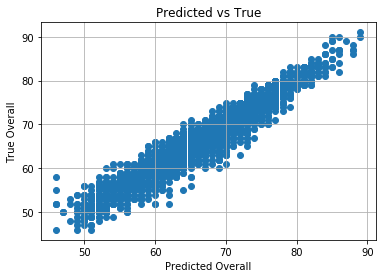

In [5]:
#Model Creation
y=data[['Overall']].copy()
X=data[attribute_profile].copy()


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))
print("Root Mean Square Error of test set is:" ,RMSE_test)
from sklearn import metrics
from sklearn.model_selection import cross_val_score
#CVscores=cross_val_score(classifier, X, y, cv=5)
#print(CVscores)
fig,ax=plt.subplots()
predicted=y_pred
true=y_test
ax.scatter(predicted,true)
plt.xlabel('Predicted Overall')
plt.ylabel('True Overall')
plt.title('Predicted vs True')
plt.grid(True)

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Classifying Overall Rating: Kernel SVM
</p><br>

Description of Method: <br> Kernel SVM is used to capture input data in a desired data type such as linear, and is used for pattern recognition, and classification. 

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  del sys.path[0]
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

Accuracy: 0.2856069146937242
Root Mean Square Error of test set is: 1.715974857226964


Text(0.5, 0, 'Predicted Overall')

Text(0, 0.5, 'True Overall')

Text(0.5, 1.0, 'Predicted vs True')

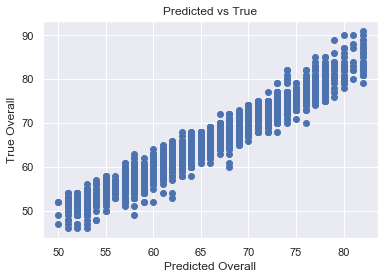

In [128]:
#Model Creation
y=data[['Overall']].copy()
X=data[attribute_profile].copy()


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predictions))


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))
print("Root Mean Square Error of test set is:" ,RMSE_test)
from sklearn import metrics
from sklearn.model_selection import cross_val_score
#CVscores=cross_val_score(classifier, X, y, cv=5)
#print(CVscores)
fig,ax=plt.subplots()
predicted=y_pred
true=y_test
ax.scatter(predicted,true)
plt.xlabel('Predicted Overall')
plt.ylabel('True Overall')
plt.title('Predicted vs True')
plt.grid(True)

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Classifying Overall Rating: Logistic Regression
</p><br>

Description of Method: <br> Logistic Regression is used when the dependent variable is binary. Regression allows us to analyze the relationship between a dependent variable and one or many independent, explanatory variables. We can also determine the statistical significance of features, which can help to narrow down the important variables.  

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  del sys.path[0]
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Accuracy: 0.11649755730928223
Root Mean Square Error of test set is: 3.657550760389424


Text(0.5, 0, 'Predicted Overall')

Text(0, 0.5, 'True Overall')

Text(0.5, 1.0, 'Predicted vs True')

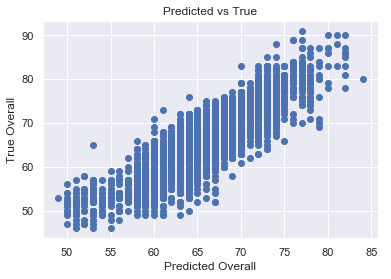

In [129]:
#Model Creation
y=data[['Overall']].copy()
X=data[attribute_profile].copy()


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predictions))


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))
print("Root Mean Square Error of test set is:" ,RMSE_test)

fig,ax=plt.subplots()
predicted=y_pred
true=y_test
ax.scatter(predicted,true)
plt.xlabel('Predicted Overall')
plt.ylabel('True Overall')
plt.title('Predicted vs True')
plt.grid(True)

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Classifying Overall Rating: Linear Discriminant Analysis Classifier
</p><br>

Description of Model: <br> Linear Discriminant Analysis is used for predictive modeling as a classification method for problems with two or more classes. The alogrithm assumes that the data is Gaussian, and that each variable has the same variance. 

/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  del sys.path[0]
/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

Accuracy: 0.21984216459977451
Root Mean Square Error of test set is: 2.0376482822999695


Text(0.5, 0, 'Predicted Overall')

Text(0, 0.5, 'True Overall')

Text(0.5, 1.0, 'Predicted vs True')

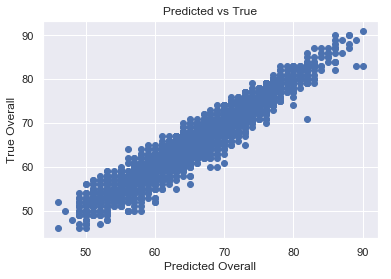

In [130]:
#Model Creation
y=data[['Overall']].copy()
X=data[attribute_profile].copy()


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Fitting LDA Classification to the Training set
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifier = LinearDiscriminantAnalysis(solver='svd', tol=0.0001)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predictions))


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
from sklearn.metrics import mean_squared_error
RMSE_test=sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))
print("Root Mean Square Error of test set is:" ,RMSE_test)

fig,ax=plt.subplots()
predicted=y_pred
true=y_test
ax.scatter(predicted,true)
plt.xlabel('Predicted Overall')
plt.ylabel('True Overall')
plt.title('Predicted vs True')
plt.grid(True)

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Classifying Overall Rating: Clasifier Performance Conclusion 
</p><br>

The two best performing models for classifying Oveall rating were Random Forrest Classification and Kernel SVM.

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Clustering Basic Attributes
</p><br>

Description of Method: <br> Clustering is used to group features by their commonalities based on distance between centroids using methods such as Euclidean Distance. 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'The Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

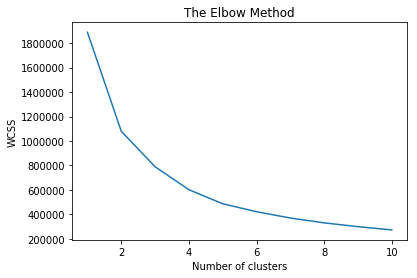

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [5]:
data=pd.read_csv("Full_DF.csv")
#Model Creation
#y=data[['Overall']].copy()
X=data[['Overall', 'Potential', 'age']].copy()



# Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
#The Elbow Method for Finding Ideal # of Clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#The Elbow method above shows that about 3 Clusters is appropriate
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
kmeans.labels_
cluster_centers=kmeans.cluster_centers_
score=kmeans.score(X)
y_kmeans

   pac  sho  dri  pas  defend  phy  reactions
0   90   93   90   82      33   80         96
1   89   90   96   86      26   61         95
2   92   84   95   79      30   60         88
3   82   90   87   79      42   81         93
4   91   90   89   95      60   91         85


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

Text(0.5, 1.0, 'KNN Clustering for pac')

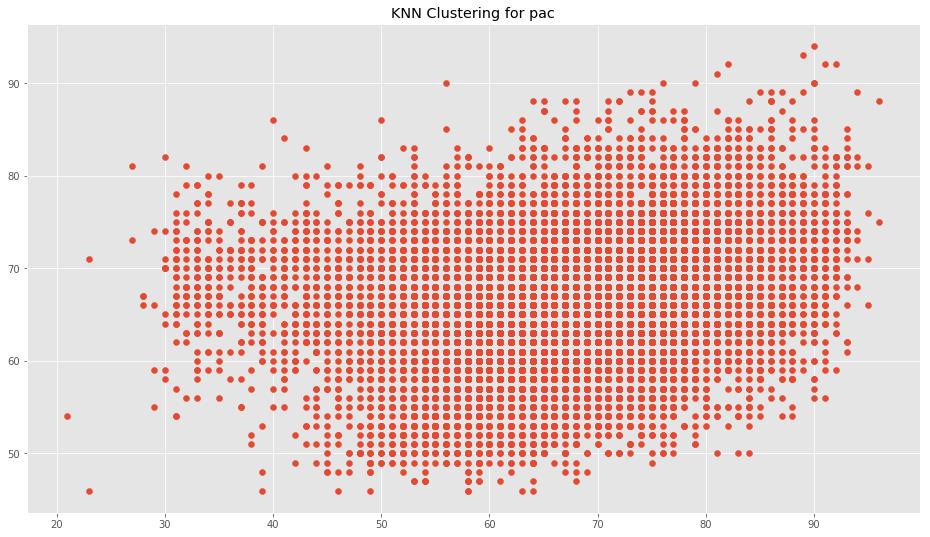

Text(0.5, 1.0, 'KNN Clustering for sho')

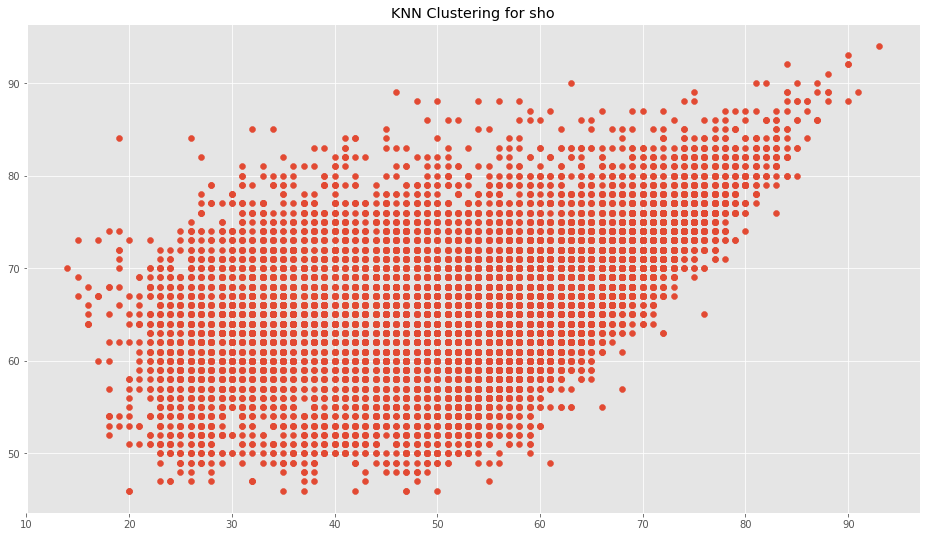

Text(0.5, 1.0, 'KNN Clustering for dri')

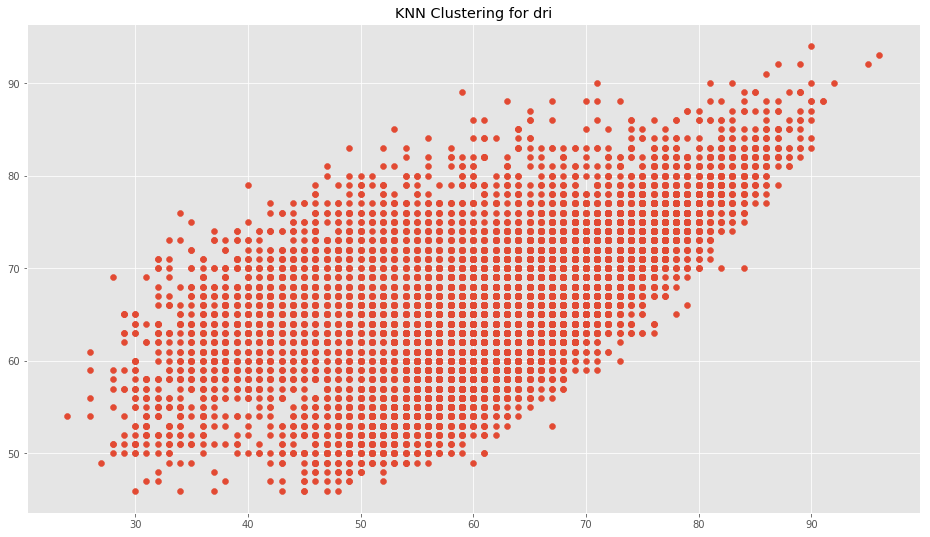

Text(0.5, 1.0, 'KNN Clustering for pas')

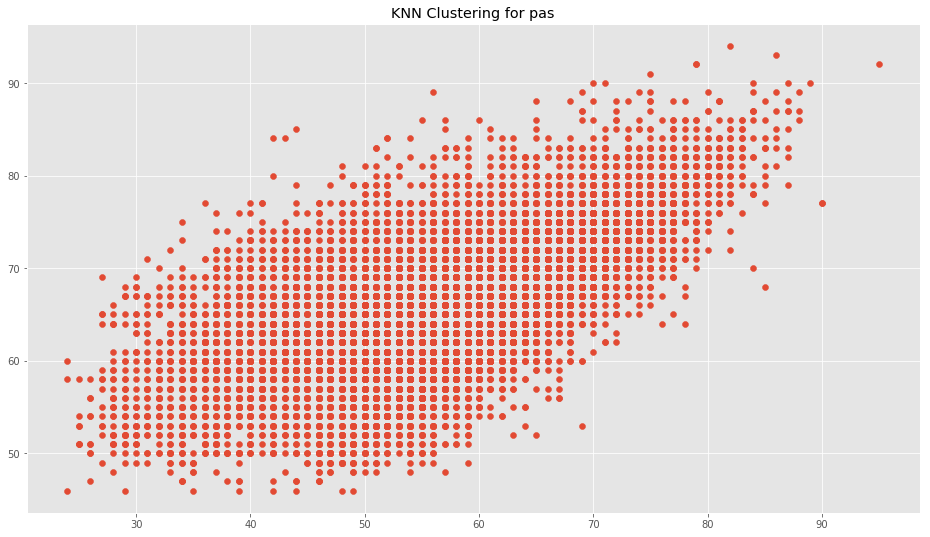

Text(0.5, 1.0, 'KNN Clustering for defend')

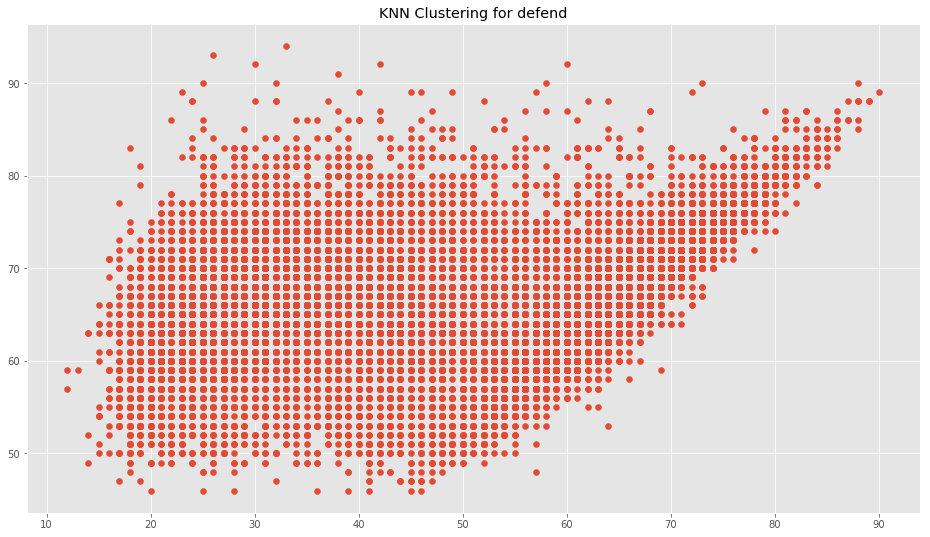

Text(0.5, 1.0, 'KNN Clustering for phy')

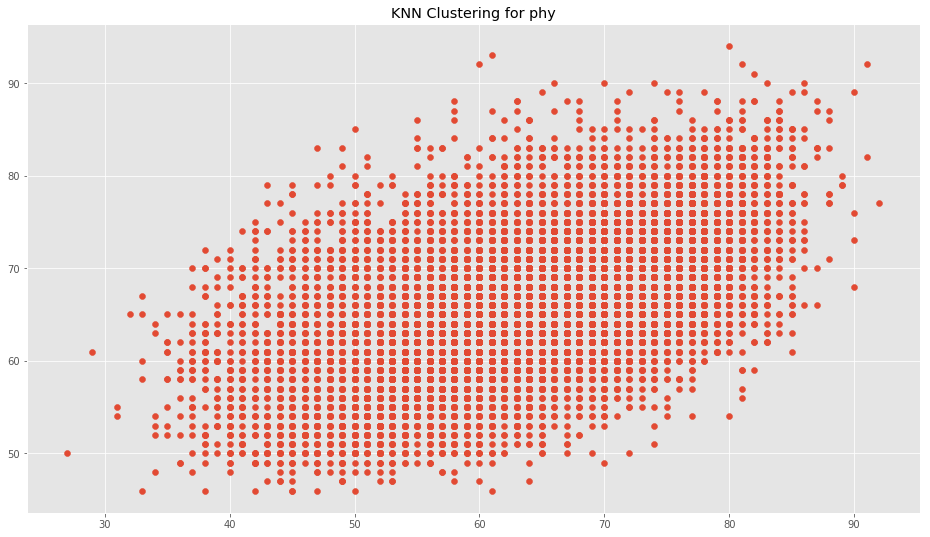

Text(0.5, 1.0, 'KNN Clustering for reactions')

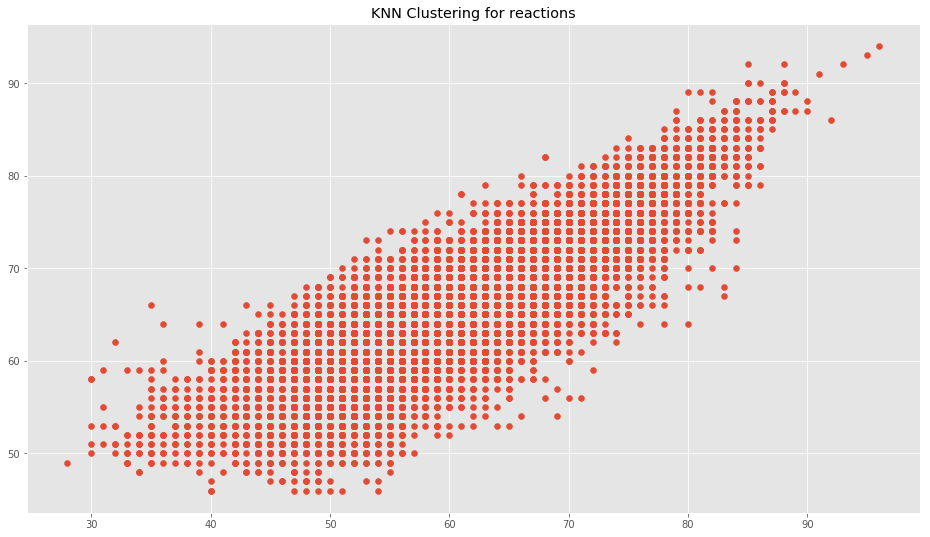

In [6]:
#clustering basic features
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import tkinter as tk
import statsmodels.api as sm
fifa_data_orig = pd.read_csv('full_fifa18_data.csv')
#Creating the KNN Dataset with Attributes
clustData = fifa_data_orig.copy()
clustDep = clustData['Overall']
knnFeatures = clustData[['pac', 'sho', 'dri', 'pas', 'defend', 'phy', 'reactions']]
print(knnFeatures[0:5])

#K Nearest Neighbor
knnModel = KNeighborsClassifier(n_neighbors = 4)
#Running the model with testing data
knnModel.fit(knnFeatures, clustDep)
#Prediction using the testing data
y_pred = knnModel.predict(knnFeatures)
x_min, x_max = knnFeatures.min() - 1, knnFeatures.max() + 1
y_min, y_max = knnFeatures.min() - 1, knnFeatures.max() + 1
#xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
plt.scatter(knnFeatures['pac'], clustDep)
#plt.xlim(x_min(), x_max())
#plt.ylim(y_min(), y_max())

#Plotting KNN
plt.title("KNN Clustering for pac")
plt.show()

plt.scatter(knnFeatures['sho'], clustDep)
plt.title("KNN Clustering for sho")
plt.show()

plt.scatter(knnFeatures['dri'], clustDep)
plt.title("KNN Clustering for dri")
plt.show()

plt.scatter(knnFeatures['pas'], clustDep)
plt.title("KNN Clustering for pas")
plt.show()

plt.scatter(knnFeatures['defend'], clustDep)
plt.title("KNN Clustering for defend")
plt.show()

plt.scatter(knnFeatures['phy'], clustDep)
plt.title("KNN Clustering for phy")
plt.show()

plt.scatter(knnFeatures['reactions'], clustDep)
plt.title("KNN Clustering for reactions")
plt.show()


<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Feature Ranking for Overall & Potential with Gradient Boosting Machines <br>
    <br> and Hyperparameter Tuning with Grid Search
</p><br>

Description of Method: <br> The concept of Boosting is when the predictors are added to the model sequentially. In this model the predictors learn from the mistakes of predictors in the previous iterations, thus making the model more efficient each time.

Overall Rating Feature Ranking


Model Report
RMSE : 1.521
CV Score : Mean - 2.333 | Std - 1.408 | Min - 1.442 | Max - 5.53


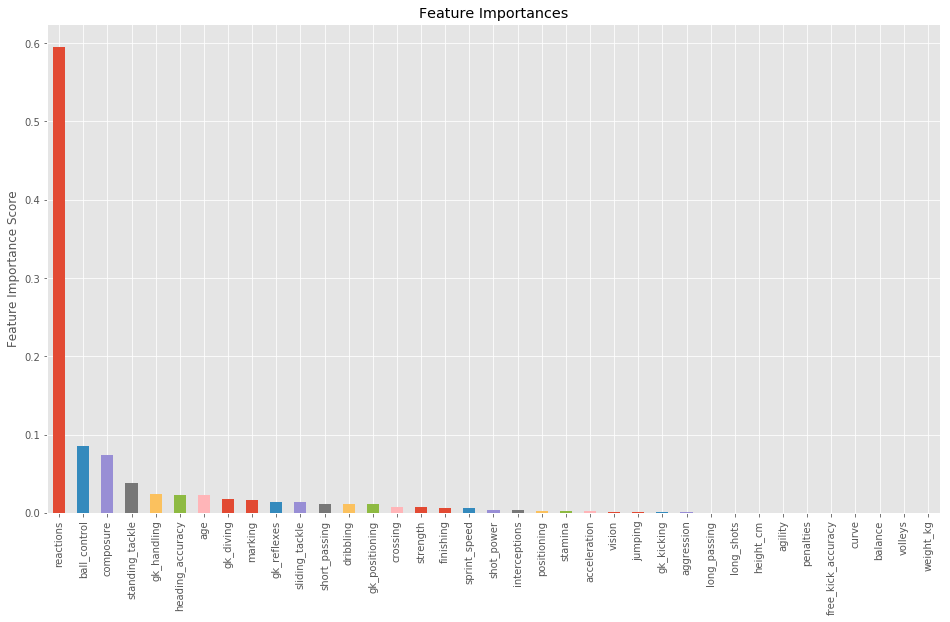

In [9]:
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import recall_score
gb_model_overall=['Overall','age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes']
dta=data[gb_model_overall]

#Algorithm Design 
def modelfit(alg, dtrain, features, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
    
    alg.fit(dtrain[features],dtrain["Overall"] )
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[features])

    #Perform cross-validation:
    cv_score =  cross_val_score(alg, dtrain[features], dtrain["Overall"], cv=cv_folds,
                                                scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain["Overall"], dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),
                                                                             np.std(cv_score),np.min(cv_score),
                                                                              np.max(cv_score)))
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, features).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
#Gradient Boosting Regressor Fit
features = [i for i in dta.columns if i != "Overall"]
target = "Overall"
gbm0 = GradientBoostingRegressor(random_state=7)
modelfit(gbm0, dta, features)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': [700, 710, 720, 730, 740]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

(<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise-deprecating',
        estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
        fit_params=None, iid=False, n_jobs=4,
        param_grid={'n_estimators': [700, 710, 720, 730, 740]},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring='neg_mean_squared_error', verbose=0)>,
 {'n_estimators': 740},
 -3.4734194554188926)


Model Report
RMSE : 0.6862
CV Score : Mean - 1.591 | Std - 0.971 | Min - 0.9888 | Max - 3.673


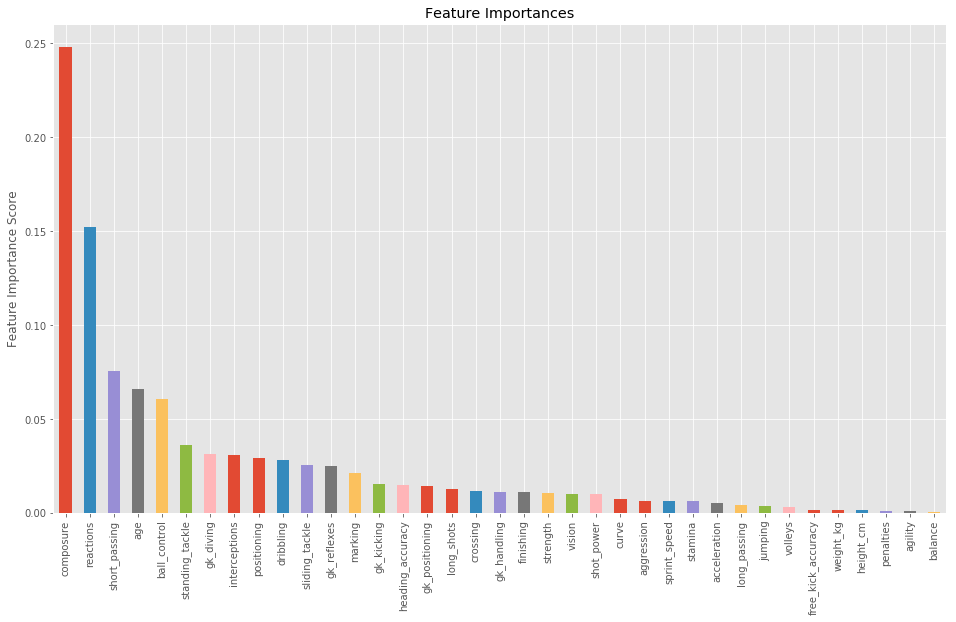

In [10]:
#Tuning with GridSearch
#Hyperparameter tuning of estimators with GridSearch
estimators = [x for x in range(700,750,10)]
param_test1 = {'n_estimators':estimators}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch1.fit(dta[features],dta["Overall"])

gsearch1.score, gsearch1.best_params_, gsearch1.best_score_
modelfit(gsearch1.best_estimator_, dta, features)

Potential Rating Feature Ranking


Model Report
RMSE : 2.241
CV Score : Mean - 2.903 | Std - 1.351 | Min - 1.908 | Max - 5.954


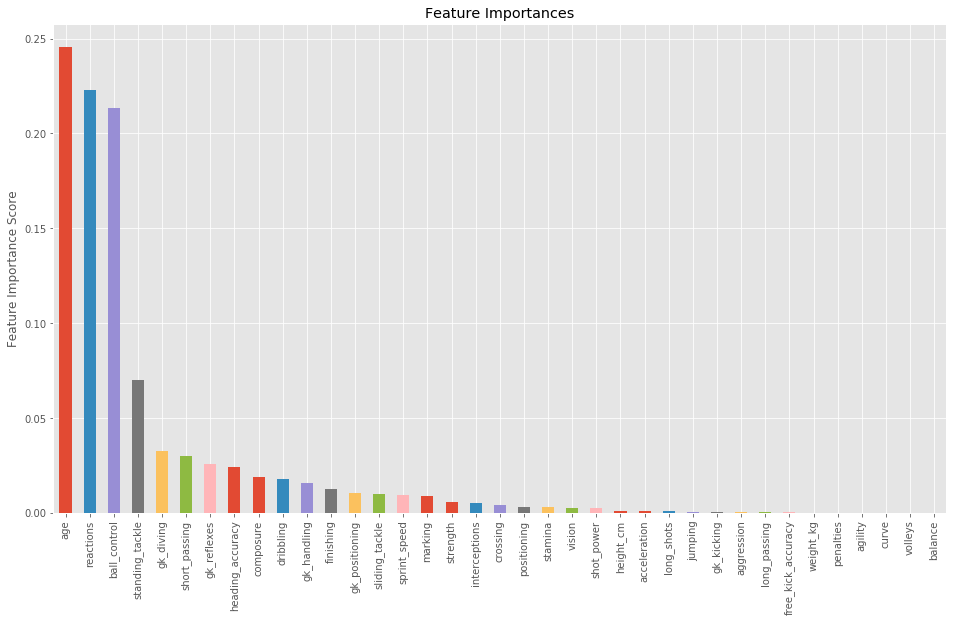

In [11]:
gb_model_potential=['Potential','age', 'height_cm', 'weight_kg', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes']

dta=data[gb_model_potential]
#Algorithm Design 
def modelfit(alg, dtrain, features, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
    
    alg.fit(dtrain[features],dtrain["Potential"] )
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[features])

    #Perform cross-validation:
    cv_score =  cross_val_score(alg, dtrain[features], dtrain["Potential"], cv=cv_folds,
                                                scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain["Potential"], dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),
                                                                             np.std(cv_score),np.min(cv_score),
                                                                              np.max(cv_score)))
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, features).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
#Gradient Boosting Regressor Fit
features = [i for i in dta.columns if i != "Potential"]
target = "Potential"
gbm0 = GradientBoostingRegressor(random_state=7)
modelfit(gbm0, dta, features)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': [700, 710, 720, 730, 740]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

(<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise-deprecating',
        estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
        fit_params=None, iid=False, n_jobs=4,
        param_grid={'n_estimators': [700, 710, 720, 730, 740]},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring='neg_mean_squared_error', verbose=0)>,
 {'n_estimators': 740},
 -6.040395972594995)


Model Report
RMSE : 1.244
CV Score : Mean - 2.289 | Std - 0.8957 | Min - 1.55 | Max - 4.226


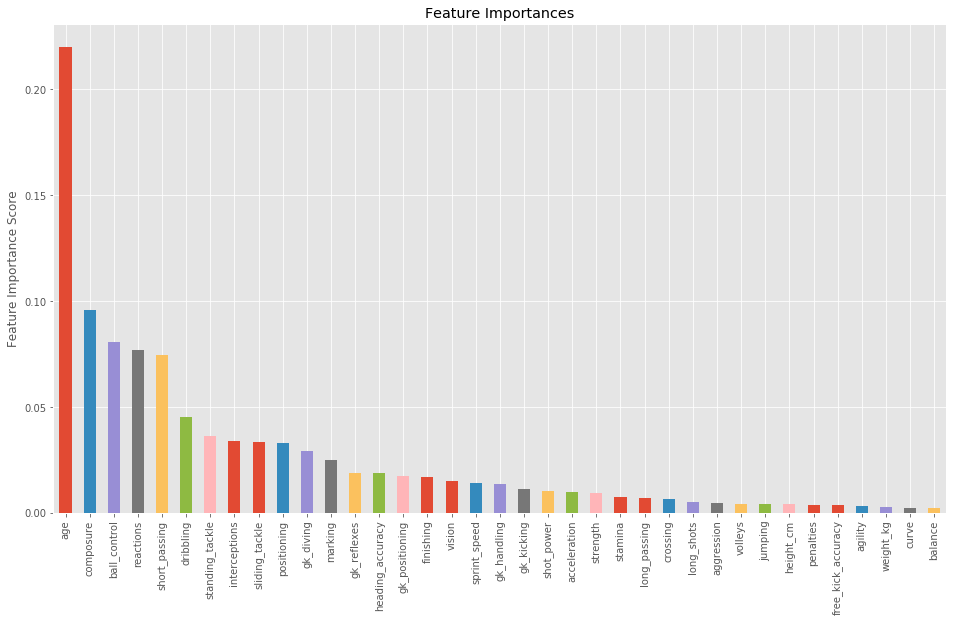

In [12]:
#Hyperparameter tuning of estimators with GridSearch
estimators = [x for x in range(700,750,10)]
param_test1 = {'n_estimators':estimators}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch1.fit(dta[features],dta["Potential"])

gsearch1.score, gsearch1.best_params_, gsearch1.best_score_
modelfit(gsearch1.best_estimator_, dta, features)

Here we use Gradient boosting regression to come up with a preliminary feature ranking for both overall and potential. We then use GridSearch Hyperparameter tuning to ehnance our model and thus re-rank the features.

# Findings & Implications

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Results: Regression on Overall Rating
</p><br>

Most importantly our model gives us an R-squared of about 85%, thus we can proceed with this critical assumption that our features are highly correlated with overall rating. OLS regression with Robust SE was used on all players to see which features were statistically significant at alpha =5%. We used robust regression with Huber’s Maximum likelihood estimation and comparison of statistically significant features and confidence intervals with results from OLS. As ridge regression is good in dealing with collinearity, we conduct ridge regression with a weight=1 and observed the change in coefficients and intercept.
We conducted lasso regression with various 𝛼 as a means of feature reduction.
Using L1 and L2 regularization helped us in dealing with collinearity. <br>
<br>
The results of our various regression models were as follows: <br>
	OLS model R-squared results: 0.845<br>
	Ridge with α=1 R-square results=0.845<br>
	Lasso with α=1 R-square results=0.845<br>
	Lasso with α=8 and reduced features=0.8<br>
<br>
<br>
All of our regressions showed that the 5 most important features in determining overall rating independent of position in order are: reactions, composure, heading accuracy, short passing, and goal keeper handling. This was determined by the magnitude of the coefficients and z-statistics at alpha=5%. <br>
 However, it doesn’t make too much sense to evaluate these features independent of position, which is why when we create our value models, we must segment players by position. 


<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Results: Positional Value Modeling
</p><br>

This approach to finding a value model for this position is based on the assumption that the main determinant to market value is a players overall rating.
<br/>
The approach to find a model that describes value for this position with a reduced number of features is the following:
<br/>
To gain basic insights we conduct simple OLS with robust SE on Overall for this position group with all attributes in the "attribute_profile" list. Then to reduce the number of variables that matter we fit a lasso regression model on overall. The reason we fit our lasso on overall and not value is that by doing so on overall we see what few features actually make good players, at a given position, good. We compute pearson correlations on the lasso reduced model.When doing lasso regression, we use cross-validation to find the correct alpha to use. After this we choose all the features with a non-zero coefficient, and regardless if their coefficient is non-zero, we include non-soccer attributes such as Age, weight, and height.
<br/> 
Since multicollinearity is likely, we conduct ridge regression on the non-zero coefficients from the lasso model. We use cross validation to also choose the correct alpha for our ridge regression. 
<br/> We then evaluate the reduced model performance, and compare it to the model performance of all the attributes on Value.


<br/>
We conduct gradient boosting regression with grid search cross validation on our lasso reduced model to rank feature importance for a position with respect to value. We then use interaction terms to combine highly correlated features and further reduce our model.
<br> Lastly, we re-estimate our own reduced value model we created and compare it to the original model. 

<br>
<br>
Our goal was to come up with a reduced value model by position that reduces the number of features, eliminates collinearity between the remaining features, ranks the features by importance (with respect to value), and is an improvement in predictive power compared to the original model. We successfully achieved this goal using the procedure above for all positions. For goal keepers it was determined the 3 most important features are goal keeper reflexes, handling and diving, and our reduced model had an r-squared of 0.6. For centerbacks the most important features were reactions, sliding tackle, and interceptions and our reduced model had an r-square of about 0.66. For full backs the most important featues were short passing, reactions and sliding tackles, and our reduced model produced an r-square of about 0.62. For center midfielders, our most important features were ball control, reactions, short passing, and vision, and our reduced model had an r-squared of about 0.58. For wingers, we determined the most important featues as ball control, positioning, finishing, and dribbling. Our reduced model for wingers had an r-squared of about 0.60. For forwards our most important features were finishing, reactions, positioning, and ball control. Our reduced model for forwards produced an r-squared of about 0.58. 
In conclusion our value models reduced the number of features with lasso regression, ranked the feature importance with gradient boosting regression and fabricated new models with no collinearity issues by creating interaction terms between highly correlated features. Lastly, where the original value models had r-squared values around 0.35-0.40, our models we created had r-squared values between 0.57-0.66, and were thus able to improve the ability to model value by position.  

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Results: Analysis of Classification Methods
</p><br>

Our purpose in using classification methods was to predict a players position, given an attribute profile, and to treat overall rating as a categorical variable and test several methods to determine which models would be best at predicting overall rating. <br>
For predicting player position we used k-NN classification, and had success in predicting position. When scoring the model we obtained a score of 0.502. This model may be of value in the future as AI gets more involved in the world of soccer scouting, an AI system could predict the best positional fit for a young player based on the attributes they have. <br>
<br>
For predicting overall rating we treated overall as a categorical variable with 100 different categories (0-100). The reason for doing this was to analyze how closely a players rating could be predicted compared to when we treated overall as a numeric variable and conducted regression. In classifying overall rating we used several models: random forrest, bayesian classification, support vector machines, kernel SVM, logistic regression and LDA classification. When we scored our models we often recived low scores, as a result of including 100 different classes, thus we also included the root mean square so we could compare our classification models to our regression models, as well as a confusion matrix. The purpose of doing this was to identify the two best models for predicting overall rating when we treat that as a category, so that we could expand upon these models in the future. 
<br> Our two models that performed the best were random forrest and kernel SVM. Random forrest had an accuracy score of 0.439 and RMSE of about 1.5, while kernel SVM had an accuracy score of 0.286 and RMSE 1.716. Our least performant model was bayesian classification with an accuracy score of 0.117 and an RMSE of 5.258.

<br> When we changed overall to a categorical variable this became a non-linear problem. Some reasons random forrest performed so well was random forrest is oowerful and accurate, good performance on many problems, including non linear problems. Some reasons why kernel SVM performed well were, kernel SVM has high performance on nonlinear problems, and is not biased by outliers, or not sensitive to overfitting.

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Results: Analysis of Clustering Methods
</p><br>

We utilized k-means clustering to identify clusters of basic attributes. We chose k-mens because it is simple to understand, easily adaptable, works well on small or large datasets, is fast, efficient and performant. However, the one big challenge for k-means is you have to identify how many clusters you need. To do so we used the elbow method and found that the ideal amount of clusters was about 4. The basic attributes that we clustered were pace,  shooting, dribbling, passing, defending,  physicality, and reactions. 
<br> The results obtained from doing this is shown below


In [14]:
fifa_data_orig = pd.read_csv('full_fifa18_data.csv')
#Creating the KNN Dataset with Attributes
clustData = fifa_data_orig.copy()
clustDep = clustData['Overall']
knnFeatures = clustData[['pac', 'sho', 'dri', 'pas', 'defend', 'phy', 'reactions']]
print(knnFeatures[0:5])
knnModel = KNeighborsClassifier(n_neighbors = 4)
#Running the model with testing data
knnModel.fit(knnFeatures, clustDep)
y_pred = knnModel.predict(knnFeatures)
x_min, x_max = knnFeatures.min() - 1, knnFeatures.max() + 1
y_min, y_max = knnFeatures.min() - 1, knnFeatures.max() + 1

   pac  sho  dri  pas  defend  phy  reactions
0   90   93   90   82      33   80         96
1   89   90   96   86      26   61         95
2   92   84   95   79      30   60         88
3   82   90   87   79      42   81         93
4   91   90   89   95      60   91         85


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Implications
</p><br>

Our findings provided can provide a basis for training AI systems on what to look for by position when trying to scout players. The ultimate goal is to move towards a system that can scout players more efficiently and identify young up and coming prospects before curent human scouts could. Our findings also shed financial insight to clubs so that they can understand how to better structure player contracts and proposals they may make for players on the transfer market, given a set of attributes by a player at a position. 

# Conclusion

In this analysis we were successfully able to get insights into what makes a good player and what determines their market value. We conducted dimensionality reduction with PCA and tuned lasso regression. Additionally we successfully created enhanced value models by position and conducted regression analysis on value and the elasticity of value. An enhanced and reduced value model that eliminates collinearity with feature engineering, and interaction terms as well as out performs the original model was created. We identified the optimal classification methods to predict a players overall rating. Also we came up with our own algorithm to rank features and used GridSearchCV for hyperparameter tuning. Players were clustered based on basic features.<br>
The implications of our results can help train AI systems on what to look for when scouting players, and help clubs financially structure contracts based on player attributes. 


<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:bold">
<br>
Future Methods
</p><br>

Some future methods we intend on exploring are: <br>
Conduct further modeling with classification algorithms as opposed to seeing which model just performs best. <br> 
<br>The primary focus of our future analysis will be regarding the development of a recommender system that recommends players to teams based on team style, budget, and current players on a team. Specifically we will explore alternating least squares as a recommender system. <br>
<br>We will seek to use deep learning and reinforcement learning to identify future top prospects faster than scouts can so that a competitive advantage will be achieved.



# Appendix

To see how the data cleaning and prep was done please visit: https://github.com/Lucasnewman5732/Lucas-Newman-5732/blob/master/FIFA_DATA_Preprocessing_Cleaning_Creation.ipynb

<br>For reference to a data file needed please visit: https://www.kaggle.com/lucasnewman5732/buan6340project

# References 

<p style="font-family: Arial; font-size:1.70em;color:Black; font-style:Italics">


[1] Kumar, Gunjan. (2013). Machine Learning for Soccer Analytics. 10.13140/RG.2.1.4628.3761. <br>
[2] VanderPlas, J. T. (2017). Python Data Science Handbook: Essential Tools for Working with Data. Sebastopol, CA: OReilly Media.<br>
[3] Müller, A. C., & Guido, S. (2017). Introduction to Machine Learning with Python: A Guide for Data Scientists. Beijing: OReilly.<br>
[4] Hastie, T., Tibshirani, R., & Friedman, J. H. (2017). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. New York, NY: Springer.<br<
[5] Bishop, C. M. (2016). Pattern Recognition and Machine Learning. New York, NY: Springer-Verlag.<br>
[6] Mitchell, T. M. (2017). Machine learning. New York: McGraw Hill.